<a href="https://colab.research.google.com/github/carlosgomezagrafojo/pollution-data/blob/main/proyect_contaminacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [221]:
# Generamos un nuevo notebook y lo sincronizamos con la cuenta nuestro Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [222]:
# Instalamos módulo de python
!pip install numpy

# Tabla instrument data

In [223]:
# importamos pandas, creamos df y verificamos los primeros registros
import pandas as pd
ruta_instrument_data = "/content/drive/MyDrive/proyecto_contaminacion_qraneos/instrument_data.csv"  # Ajusta la ruta
df_instrument = pd.read_csv(ruta_instrument_data, header = 0)  # Usa la primera fila como encabezado
df_instrument.head()

,Measurement date,Station code,Item code,Average value,Instrument status
0,2021-01-01 00:00:00,204,0,0.004,0
1,2021-01-01 00:00:00,204,2,0.059,0
2,2021-01-01 00:00:00,204,4,1.200,0
3,2021-01-01 00:00:00,204,5,0.002,0
4,2021-01-01 00:00:00,204,7,73.000,0


In [224]:
# ver nombres de las columnas df_instrument
print(df_instrument.columns)

Index(['Measurement date', 'Station code', 'Item code', 'Average value',
       'Instrument status'],
      dtype='object')


In [225]:
# Agregaremos las columnas status e item con las definiciones de las columnas Instrument status e item code, respectivamente al df_instrument
# Diccionarios de mapeo
mapeo_Item_code = {
    0: "SO2",
    2: "NO2",
    4: "CO",
    5: "O3",
    7: "PM10",
    8: "PM2.5"
}

mapeo_Instrument_status = {
    0: "Normal",
    1: "Need for calibration",
    2: "Abnormal",
    4: "Power cut off",
    8: "Under repair",
    9: "Abnormal data"
}

# aplicamos el mapeo de ambos diccionarios en paralelo a df_instrument
df_instrument["Item"] = df_instrument["Item code"].map(mapeo_Item_code)
df_instrument["Status"] = df_instrument["Instrument status"].replace(mapeo_Instrument_status)

# verificamos el resultando mostrado df_instrument
df_instrument.head()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status
0,2021-01-01 00:00:00,204,0,0.004,0,SO2,Normal
1,2021-01-01 00:00:00,204,2,0.059,0,NO2,Normal
2,2021-01-01 00:00:00,204,4,1.200,0,CO,Normal
3,2021-01-01 00:00:00,204,5,0.002,0,O3,Normal
4,2021-01-01 00:00:00,204,7,73.000,0,PM10,Normal


In [226]:
# cantidad de registros
df_instrument.count()

,0
Measurement date,3703662
Station code,3703662
Item code,3703662
Average value,3703662
Instrument status,3703662
Item,3703662
Status,3703662


In [227]:
# numero de filas y columnas1
df_instrument.shape

(3703662, 7)

In [228]:
# información general
print(df_instrument.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3703662 entries, 0 to 3703661
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Measurement date   object 
 1   Station code       int64  
 2   Item code          int64  
 3   Average value      float64
 4   Instrument status  int64  
 5   Item               object 
 6   Status             object 
dtypes: float64(1), int64(3), object(3)
memory usage: 197.8+ MB
None


In [229]:
# convierto las columnas Item y Status a strings
df_instrument["Item"] = df_instrument["Item"].astype(str)
df_instrument["Status"] = df_instrument["Status"].astype(str)
print(df_instrument.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3703662 entries, 0 to 3703661
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Measurement date   object 
 1   Station code       int64  
 2   Item code          int64  
 3   Average value      float64
 4   Instrument status  int64  
 5   Item               object 
 6   Status             object 
dtypes: float64(1), int64(3), object(3)
memory usage: 197.8+ MB
None


In [230]:
print(type(df_instrument["Item"].iloc[0]))  # Verifico el tipo del primer valor para verificar si es un string
print(type(df_instrument["Status"].iloc[0]))  # Lo mismo para la otra columna

<class 'str'>
<class 'str'>


In [231]:
# últimos 5 registros
df_instrument.tail(5)

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status
3703657,2023-11-30 23:00:00,228,7,41.000,0,PM10,Normal
3703658,2023-11-30 23:00:00,228,5,0.008,0,O3,Normal
3703659,2023-11-30 23:00:00,228,4,0.600,0,CO,Normal
3703660,2023-11-30 23:00:00,228,2,0.045,0,NO2,Normal
3703661,2023-11-30 23:00:00,228,0,0.004,0,SO2,Normal


In [232]:
# verificar si hay valores nulos
print(df_instrument.isnull().sum())

Measurement date     0
Station code         0
Item code            0
Average value        0
Instrument status    0
Item                 0
Status               0
dtype: int64


In [233]:
# verificamos si existen valores duplicados
print(df_instrument.duplicated().sum())

0


In [234]:
# transformamos la columna Measurement date en tipo datetime64[ns]
df_instrument["Measurement date"] = pd.to_datetime(df_instrument["Measurement date"])
# verificamos el cambio del tipo de dato
print(df_instrument.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3703662 entries, 0 to 3703661
Data columns (total 7 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Measurement date   datetime64[ns]
 1   Station code       int64         
 2   Item code          int64         
 3   Average value      float64       
 4   Instrument status  int64         
 5   Item               object        
 6   Status             object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 197.8+ MB
None


In [235]:
# verificamos las 1eras y las últimas fechas
print(df_instrument["Measurement date"].head())
print(df_instrument["Measurement date"].tail())

0   2021-01-01
1   2021-01-01
2   2021-01-01
3   2021-01-01
4   2021-01-01
Name: Measurement date, dtype: datetime64[ns]
3703657   2023-11-30 23:00:00
3703658   2023-11-30 23:00:00
3703659   2023-11-30 23:00:00
3703660   2023-11-30 23:00:00
3703661   2023-11-30 23:00:00
Name: Measurement date, dtype: datetime64[ns]


In [236]:
# verificamos las partes específicas de Measurement date
df_instrument["año"] = df_instrument["Measurement date"].dt.year       # Agrego la columna Año, al df_instrument
df_instrument["mes"] = df_instrument["Measurement date"].dt.month      # Agrego la columna Mes
df_instrument["día"] = df_instrument["Measurement date"].dt.day        # Agrego la columna Día
df_instrument["hora"] = df_instrument["Measurement date"].dt.hour  # "Día"
df_instrument.head()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora
0,2021-01-01,204,0,0.004,0,SO2,Normal,2021,1,1,0
1,2021-01-01,204,2,0.059,0,NO2,Normal,2021,1,1,0
2,2021-01-01,204,4,1.200,0,CO,Normal,2021,1,1,0
3,2021-01-01,204,5,0.002,0,O3,Normal,2021,1,1,0
4,2021-01-01,204,7,73.000,0,PM10,Normal,2021,1,1,0


In [176]:
# cantidad de registros por estación tomando en cuenta toda la data
df_instrument.groupby("Station code")["Average value"].count()

,Average value
Station code,
204,155430
205,146718
206,129558
207,155376
208,155340
209,138342
210,155346
211,133896
212,155424


In [177]:
# cantidad de estaciones distintas "station code"
df_instrument["Station code"].nunique()

25

In [178]:
# agrupamos por "Station code" e "Instrument status" para pivotear con "Item" a fin de sacar las siguientes medidas: promedio, cantidad, min y max
df_instrument_pivot = df_instrument.pivot_table(
    index=["Station code", "Instrument status"],  # Agrupar por Estación y Estado del Instrumento
    columns="Item",  # Pivotear por Ítem
    values="Average value",  # Agregar los valores de las mediciones
    aggfunc={"Average value": ["mean", "count" ,"min", "max"]}  # Calcular media, suma y máximo
)

df_instrument_pivot # mostrar df_pivot

count                                      \
Item                                 CO      NO2       O3     PM10    PM2.5   
Station code Instrument status                                                
204          0                  25634.0  25691.0  25694.0  25417.0  25464.0   
             1                    170.0    167.0    164.0    173.0    173.0   
             2                     50.0      NaN      NaN     53.0    125.0   
             4                     33.0     33.0     32.0     23.0     25.0   
             8                      8.0      8.0      8.0     35.0     33.0   
...                                 ...      ...      ...      ...      ...   
228          1                    214.0    216.0    212.0    133.0    199.0   
             2                      3.0     10.0     14.0     19.0      NaN   
             4                     26.0     28.0     28.0     27.0     29.0   
             8                     29.0     29.0     29.0     29.0     13.0   
             9                      NaN      6.0      1.0    602.0    231.0   

                                          max                       ...  \
Item                                SO2    CO    NO2     O3   PM10  ...   
Station code Instrument status                                      ...   
204          0                  25490.0   2.3  0.109  0.164  289.0  ...   
             1                    169.0  40.0  0.068  0.325  516.0  ...   
             2                      NaN   0.7    NaN    NaN   91.0  ...   
             4                     34.0   0.8  0.047  0.037   30.0  ...   
             8                    204.0   0.6  0.040  0.015   32.0  ...   
...                                 ...   ...    ...    ...    ...  ...   
228          1                    214.0  36.7  0.096  0.332  622.0  ...   
             2                     14.0   0.4  0.027  0.018   86.0  ...   
             4                     28.0   0.5  0.069  0.024   67.0  ...   
             8                    339.0   0.6  0.057  0.013   63.0  ...   
             9                    198.0   NaN  0.023  0.041  400.0  ...   

                                    mean                                   \
Item                                  O3        PM10      PM2.5       SO2   
Station code Instrument status                                              
204          0                  0.024597   37.733367  22.587064  0.004267   
             1                  0.029970   79.526012  69.341040  0.026166   
             2                       NaN   37.226415  21.192000       NaN   
             4                 -0.682000    0.347826  -0.280000 -0.646647   
             8                 -0.248125    3.057143   1.060606 -0.008824   
...                                  ...         ...        ...       ...   
228          1                  0.026146  112.263158  63.447236  0.027967   
             2                  0.007857   27.421053        NaN  0.004000   
             4                 -0.676750    3.740741  11.931034 -0.677929   
             8                  0.000828    3.206897   1.000000  0.018670   
             9                  0.041000   41.508306  38.952381  0.011808   

                                min                                   
Item                             CO    NO2     O3  PM10 PM2.5    SO2  
Station code Instrument status                                        
204          0                  0.2  0.004  0.001   3.0   1.0  0.001  
             1                  0.0  0.000  0.000  -1.0  -1.0  0.000  
             2                  0.2    NaN    NaN  17.0   0.0    NaN  
             4                 -1.0 -1.000 -1.000  -1.0  -1.0 -1.000  
             8                 -1.0 -1.000 -1.000  -1.0  -1.0 -1.000  
...                             ...    ...    ...   ...   ...    ...  
228          1                  0.0 -1.000  0.000  -1.0  -1.0  0.000  
             2                  0.3  0.008  0.002   1.0   NaN  0.003  
             4  

In [179]:
# creamos un data frame en donde solamente se tomen en cuenta los registros con las mediciones igual a "Normal" => Instrument status = 0 ; Status = Normal
df_instrument_normal = df_instrument[df_instrument["Instrument status"] == 0]
df_instrument_normal.head()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora
0,2021-01-01,204,0,0.004,0,SO2,Normal,2021,1,1,0
1,2021-01-01,204,2,0.059,0,NO2,Normal,2021,1,1,0
2,2021-01-01,204,4,1.200,0,CO,Normal,2021,1,1,0
3,2021-01-01,204,5,0.002,0,O3,Normal,2021,1,1,0
4,2021-01-01,204,7,73.000,0,PM10,Normal,2021,1,1,0


In [180]:
# veamos la cantidad de registros
df_instrument_normal.shape

(3606696, 11)

In [181]:
# Agrupamos por "año" y pivoteamos por Item
df_instrument_normal_pivot_time = df_instrument_normal.pivot_table(
    index="año",  # Agrupar por año
    columns="Item",  # Pivotear por Item (SO2, NO2, etc.)
    values="Average value",  # Agregar los valores de las mediciones
    aggfunc=["mean", "max"]  # Calcular la media y la suma
)
df_instrument_normal_pivot_time

mean                                                      max  \
Item        CO       NO2        O3       PM10      PM2.5       SO2   CO   
año                                                                       
2021  0.518657  0.029616  0.024908  43.775169  24.604890  0.004635  2.9   
2022  0.502998  0.028143  0.023346  39.662035  22.780400  0.004358  2.4   
2023  0.526537  0.027945  0.026197  42.985614  25.484394  0.004025  3.2   

                                         
Item    NO2     O3   PM10  PM2.5    SO2  
año                                      
2021  0.117  0.163  423.0  175.0  0.041  
2022  0.121  0.188  470.0  204.0  0.025  
2023  0.123  0.215  299.0  195.0  0.026

In [182]:
# Agrupamos por: "Station" y "año" y pivoteamos por Item
df_instrument_normal_pivot_time_Station = df_instrument_normal.pivot_table(
    index= ["Station code","año"],  # Agrupar por año
    columns="Item",  # Pivotear por Item (SO2, NO2, etc.)
    values="Average value",  # Agregar los valores de las mediciones
    aggfunc=["mean", "max"]  # Calcular la media y la suma
)
df_instrument_normal_pivot_time_Station

mean                                            \
Item                     CO       NO2        O3       PM10      PM2.5   
Station code año                                                        
204          2021  0.562500  0.033590  0.026044  40.185984  24.369249   
             2022  0.576747  0.031502  0.024709  35.416667  20.725222   
             2023  0.589843  0.029983  0.022971  37.616352  22.693726   
205          2021  0.506536  0.034689  0.025340  40.474127  24.472704   
             2022  0.511426  0.030702  0.024861  36.151676  21.546376   
...                     ...       ...       ...        ...        ...   
227          2022  0.602075  0.027259  0.023713  41.622945  22.325997   
             2023  0.510329  0.032707  0.024090  40.738098  23.388984   
228          2021  0.517993  0.030741  0.023476  48.437261  23.805923   
             2022  0.503837  0.029981  0.020798  44.411813  23.309540   
             2023  0.482979  0.028916  0.022519  41.793259  25.200769   

                             max                                     
Item                    SO2   CO    NO2     O3   PM10  PM2.5    SO2  
Station code año                                                     
204          2021  0.004260  2.2  0.109  0.140  255.0  128.0  0.014  
             2022  0.004791  2.1  0.100  0.164  289.0  127.0  0.016  
             2023  0.003742  2.3  0.089  0.137  202.0  148.0  0.017  
205          2021  0.003825  2.0  0.100  0.142  267.0  116.0  0.016  
             2022  0.003497  2.1  0.100  0.175  296.0  132.0  0.015  
...                     ...  ...    ...    ...    ...    ...    ...  
227          2022  0.003875  2.0  0.104  0.159  426.0  140.0  0.013  
             2023  0.003332  2.1  0.114  0.170  200.0  153.0  0.013  
228          2021  0.004028  2.0  0.106  0.150  423.0  144.0  0.012  
             2022  0.004482  1.8  0.113  0.135  443.0  145.0  0.013  
             2023  0.003739  1.7  0.108  0.114  255.0  171.0  0.011  

[75 rows x 12 columns]

In [184]:
# Concentración media diaria de contaminantes por estaciones
df_instrument_normal_pivot_time_Station = df_instrument_normal.pivot_table(
    index= ["Station code", "día"],  # Agrupar por día
    columns="Item",  # Pivotear por station code
    values="Average value",  # Agregar los valores de las mediciones
    aggfunc=["mean", "max"]  # Calcular la media y max
)
df_instrument_normal_pivot_time_Station

mean                                            \
Item                    CO       NO2        O3       PM10      PM2.5   
Station code día                                                       
204          1    0.578766  0.031664  0.026041  38.807876  23.622328   
             2    0.598946  0.034174  0.024711  40.044549  24.193662   
             3    0.587426  0.033516  0.025486  38.418355  23.368735   
             4    0.596349  0.033233  0.025380  38.743499  25.174123   
             5    0.554289  0.030021  0.026334  38.112981  23.550239   
...                    ...       ...       ...        ...        ...   
228          27   0.518367  0.030612  0.022588  49.079110  24.902320   
             28   0.512590  0.030928  0.021065  48.166047  24.386052   
             29   0.485392  0.028384  0.022135  47.055556  22.066756   
             30   0.506915  0.030868  0.023305  48.872973  26.248649   
             31   0.492857  0.030450  0.021019  42.016913  20.323467   

                            max                                     
Item                   SO2   CO    NO2     O3   PM10  PM2.5    SO2  
Station code día                                                    
204          1    0.004195  1.5  0.090  0.123  166.0   87.0  0.010  
             2    0.004286  1.8  0.089  0.143  160.0  121.0  0.011  
             3    0.004395  1.6  0.085  0.139  152.0  113.0  0.011  
             4    0.004310  1.7  0.085  0.098  199.0  148.0  0.011  
             5    0.004121  1.7  0.081  0.117  202.0  148.0  0.014  
...                    ...  ...    ...    ...    ...    ...    ...  
228          27   0.004139  1.6  0.089  0.084  276.0   94.0  0.011  
             28   0.004187  1.6  0.089  0.092  207.0   91.0  0.010  
             29   0.004183  1.5  0.082  0.111  174.0  116.0  0.008  
             30   0.004195  1.5  0.086  0.096  166.0  129.0  0.012  
             31   0.004029  1.6  0.078  0.082  188.0   78.0  0.008  

[775 rows x 12 columns]

# Tarea Nº 1:
# Pregunta Nº 1:

1.  Concentración media de SO2 en todos los distritos durante todo el período
2.  Indicar el promedio diario por estación.

(Limitar respuestas a 5 decimales)

In [185]:
# dataframe valores instrumento = Normal y Valores SO2; Item code = 0 => SO2
df_instrument_normal_SO2 = df_instrument_normal[df_instrument_normal["Item code"] == 0]
df_instrument_normal_SO2.head()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora
0,2021-01-01 00:00:00,204,0,0.004,0,SO2,Normal,2021,1,1,0
6,2021-01-01 01:00:00,204,0,0.004,0,SO2,Normal,2021,1,1,1
12,2021-01-01 02:00:00,204,0,0.004,0,SO2,Normal,2021,1,1,2
18,2021-01-01 03:00:00,204,0,0.004,0,SO2,Normal,2021,1,1,3
24,2021-01-01 04:00:00,204,0,0.003,0,SO2,Normal,2021,1,1,4


In [186]:
# promedio diario de SO2
promedio_diario_SO2 = df_instrument_normal_SO2.groupby("día")["Average value"].mean().reset_index()
print(promedio_diario_SO2.round(5))

    día  Average value
0     1        0.00431
1     2        0.00437
2     3        0.00442
3     4        0.00442
4     5        0.00426
5     6        0.00415
6     7        0.00404
7     8        0.00430
8     9        0.00436
9    10        0.00410
10   11        0.00412
11   12        0.00433
12   13        0.00436
13   14        0.00435
14   15        0.00430
15   16        0.00441
16   17        0.00450
17   18        0.00462
18   19        0.00449
19   20        0.00443
20   21        0.00440
21   22        0.00449
22   23        0.00451
23   24        0.00440
24   25        0.00441
25   26        0.00433
26   27        0.00447
27   28        0.00449
28   29        0.00439
29   30        0.00438
30   31        0.00417


In [187]:
# promedio diario de SO2 por estación
df_instrument_normal_SO2_estacion = df_instrument_normal_SO2.groupby(["día", "Station code"])["Average value"].mean()
print(df_instrument_normal_SO2_estacion.round(5))

día  Station code
1    204             0.00419
     205             0.00344
     206             0.00354
     207             0.00433
     208             0.00423
                      ...   
31   224             0.00477
     225             0.00398
     226             0.00509
     227             0.00370
     228             0.00403
Name: Average value, Length: 775, dtype: float64


In [188]:
# Concentración promedio diaria de SO2 pivoteando estación
df_instrument_normal_SO2_pivot = df_instrument_normal_SO2.pivot_table(
    index="día",  # Agrupar por día
    columns="Station code",  # Pivotear por estación
    values="Average value",  # Agregar los valores de las mediciones
    aggfunc="mean"  # Calcular la media
)
df_instrument_normal_SO2_pivot.round(5)

Station code,204,205,206,207,208,209,210,211,212,213,...,219,220,221,222,223,224,225,226,227,228
día,,,,,,,,,,,,,,,,,,,,,
1,0.00419,0.00344,0.00354,0.00433,0.00423,0.00390,0.00426,0.00425,0.00542,0.00578,...,0.00508,0.00534,0.00389,0.00447,0.00368,0.00469,0.00424,0.00517,0.00389,0.00408
2,0.00429,0.00356,0.00369,0.00446,0.00429,0.00396,0.00427,0.00436,0.00554,0.00575,...,0.00524,0.00543,0.00396,0.00461,0.00374,0.00489,0.00425,0.00529,0.00381,0.00407
3,0.00440,0.00367,0.00374,0.00452,0.00434,0.00397,0.00441,0.00440,0.00550,0.00586,...,0.00522,0.00519,0.00403,0.00435,0.00387,0.00482,0.00429,0.00544,0.00396,0.00414
4,0.00431,0.00368,0.00374,0.00447,0.00446,0.00390,0.00444,0.00460,0.00551,0.00586,...,0.00509,0.00523,0.00390,0.00441,0.00384,0.00462,0.00424,0.00541,0.00412,0.00412
5,0.00412,0.00353,0.00366,0.00429,0.00414,0.00382,0.00430,0.00429,0.00531,0.00584,...,0.00485,0.00517,0.00388,0.00425,0.00365,0.00464,0.00424,0.00521,0.00396,0.00397
6,0.00401,0.00328,0.00330,0.00419,0.00409,0.00375,0.00425,0.00435,0.00514,0.00582,...,0.00488,0.00517,0.00374,0.00425,0.00348,0.00461,0.00413,0.00509,0.00369,0.00383
7,0.00391,0.00310,0.00326,0.00403,0.00389,0.00355,0.00413,0.00415,0.00511,0.00584,...,0.00469,0.00491,0.00358,0.00415,0.00333,0.00440,0.00403,0.00500,0.00368,0.00377
8,0.00420,0.00342,0.00355,0.00426,0.00430,0.00390,0.00429,0.00445,0.00534,0.00600,...,0.00492,0.00519,0.00386,0.00451,0.00366,0.00471,0.00426,0.00519,0.00395,0.00403
9,0.00427,0.00345,0.00361,0.00427,0.00433,0.00394,0.00438,0.00446,0.00541,0.00595,...,0.00500,0.00529,0.00395,0.00449,0.00369,0.00471,0.00429,0.00524,0.00400,0.00414


# Pregunta Nº 2:

1.   Analizar como varían los niveles de contaminación según la temporada del año
2.   Mostrar los niveles de CO por temporada en la Estación 209

(Toma todo el mes de diciembre como parte del invierno, marzo como primavera, y así sucesivamente.)
Proporciona la respuesta con 5 decimales.)

In [189]:
# valores de la columna mes
df_instrument["mes"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [237]:
# insertaremos la columna estación del año: primavera, verano, otoño e invierno; invierno: 12,1,2 ; primavera: 3,4,5 ; verano: 6,7,8 ; otoño. 9,10,11
import numpy as np

# Definir las condiciones para cada estación del año según el mes
condiciones = [
    df_instrument['mes'].isin([3, 4, 5]),  # Primavera
    df_instrument['mes'].isin([6, 7, 8]),     # Verano
    df_instrument['mes'].isin([9, 10, 11]),     # Otoño
    df_instrument['mes'].isin([12, 1, 2])   # Invierno
]

# Estaciones correspondientes a cada grupo de meses
estaciones = ['primavera', 'verano', 'otoño', 'invierno']

# Crear la nueva columna 'temporada' en el DataFrame original
df_instrument['Temporada del Año'] = np.select(condiciones, estaciones, default='desconocido')


df_instrument.head()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año
0,2021-01-01,204,0,0.004,0,SO2,Normal,2021,1,1,0,invierno
1,2021-01-01,204,2,0.059,0,NO2,Normal,2021,1,1,0,invierno
2,2021-01-01,204,4,1.200,0,CO,Normal,2021,1,1,0,invierno
3,2021-01-01,204,5,0.002,0,O3,Normal,2021,1,1,0,invierno
4,2021-01-01,204,7,73.000,0,PM10,Normal,2021,1,1,0,invierno


In [191]:
print(df_instrument.columns)

Index(['Measurement date', 'Station code', 'Item code', 'Average value',
       'Instrument status', 'Item', 'Status', 'año', 'mes', 'día', 'hora',
       'Temporada del Año'],
      dtype='object')


# Esta línea de código se ejecuta si aparece duplicada la columna Temporada del Año
# Eliminar la columna vieja si existe
df_instrument.drop(columns='Temporada del Año', inplace=True)
print(df_instrument.columns)

In [ ]:
# esta línea de código se ejecuta si aparece duplicada la columna Temporada del Año
# Eliminar la columna vieja si existe
df_instrument.drop(columns='Temporada del Año', inplace=True)
print(df_instrument.columns)

Index(['Measurement date', 'Station code', 'Item code', 'Average value',
       'Instrument status', 'Item', 'Status', 'año', 'mes', 'día',
       'día_semana'],
      dtype='object')


In [238]:
# Al df_instrument, le insertaremos una nueva columna con los niveles de contaminación (level pollution), cuyos valores depemderán tanto de los valores de las columnas promedio "Average value" como del contaminante "Item"

# Definimos las condiciones para cada combinación de "Item code" y "Average value"
condiciones = [
    # Condiciones para Item code = 0
    (df_instrument['Item code'] == 0) & (df_instrument['Average value'] <= 0.02),  # Good
    (df_instrument['Item code'] == 0) & (df_instrument['Average value'] <= 0.05),  # Normal
    (df_instrument['Item code'] == 0) & (df_instrument['Average value'] <= 0.15),  # Bad
    (df_instrument['Item code'] == 0) & (df_instrument['Average value'] >= 1), # Very bad

    # Condiciones para Item code = 2
    (df_instrument['Item code'] == 2) & (df_instrument['Average value'] <= 0.03),  # Good
    (df_instrument['Item code'] == 2) & (df_instrument['Average value'] <= 0.06),  # Normal
    (df_instrument['Item code'] == 2) & (df_instrument['Average value'] <= 0.20), # Bad
    (df_instrument['Item code'] == 2) & (df_instrument['Average value'] >= 2), # Very bad

    # Condiciones para Item code = 4
    (df_instrument['Item code'] == 4) & (df_instrument['Average value'] <= 2),  # Good
    (df_instrument['Item code'] == 4) & (df_instrument['Average value'] <= 9),  # Normal
    (df_instrument['Item code'] == 4) & (df_instrument['Average value'] <= 15), # Bad
    (df_instrument['Item code'] == 4) & (df_instrument['Average value'] >= 50), # Very bad

    # Condiciones para Item code = 5
    (df_instrument['Item code'] == 5) & (df_instrument['Average value'] <= 0.03),  # Good
    (df_instrument['Item code'] == 5) & (df_instrument['Average value'] <= 0.09),  # Normal
    (df_instrument['Item code'] == 5) & (df_instrument['Average value'] <= 0.15), # Bad
    (df_instrument['Item code'] == 5) & (df_instrument['Average value'] >= 0.5), # Very bad

    # Condiciones para Item code = 7
    (df_instrument['Item code'] == 7) & (df_instrument['Average value'] <= 30),  # Good
    (df_instrument['Item code'] == 7) & (df_instrument['Average value'] <= 80),  # Normal
    (df_instrument['Item code'] == 7) & (df_instrument['Average value'] <= 150), # Bad
    (df_instrument['Item code'] == 7) & (df_instrument['Average value'] >= 600), # Very bad

    # Condiciones para Item code = 8
    (df_instrument['Item code'] == 8) & (df_instrument['Average value'] <= 15),  # Good
    (df_instrument['Item code'] == 8) & (df_instrument['Average value'] <= 35),  # Normal
    (df_instrument['Item code'] == 8) & (df_instrument['Average value'] <= 75), # Bad
    (df_instrument['Item code'] == 8) & (df_instrument['Average value'] >= 500), # Very bad

]

# Los valores que se asignarán a "Level pollution" según cada condición
valores = [
    'Good',   # Para la primera condición (Item code = 0 y Average value <= 0.02)
    'Normal', # Para la segunda condición (Item code = 0 y Average value <= 0.05)
    'Bad',    # Para la tercera condición (Item code = 0 y Average value <= 0.15)
    'Very bad', # Para la cuarta condición (Item code = 0 y Average value >= 1)

    'Good',   # Para la quinta condición (Item code = 2 y Average value <= 0.03)
    'Normal', # Para la sexta condición (Item code = 2 y Average value <= 0.06)
    'Bad',    # Para la septima condición (Item code = 2 y Average value <= 0.20)
    'Very bad', # Para la octava condición (Item code = 2 y Average value >= 2)

    'Good',   # Para la novena condición (Item code = 4 y Average value <= 2)
    'Normal', # Para la decima condición (Item code = 4 y Average value <= 9)
    'Bad',    # Para la undecima condición (Item code = 4 y Average value <= 15)
    'Very bad', # Para la doceava condición (Item code = 4 y Average value <= 50)

    'Good',   # Para la decimatercera condición (Item code = 5 y Average value <= 0.03)
    'Normal', # Para la decimacuarta condición (Item code = 5 y Average value <= 0.09)
    'Bad',    # Para la decimaquinta condición (Item code = 5 y Average value <= 0.15)
    'Very bad', # Para la decimasexta condición (Item code = 5 y Average value <= 0.5)

    'Good',   # Para la decimaseptima condición (Item code = 7 y Average value <= 30)
    'Normal', # Para la decimaoctava condición (Item code = 7 y Average value <= 80)
    'Bad',    # Para la decimanovena condición (Item code = 7 y Average value <= 150)
    'Very bad', # Para la vigésima condición (Item code = 7 y Average value <= 600)

    'Good',  # Para la vigésima primera condición (Item code = 8 y Average value <= 15
    'Normal', # Para la vigésima segunda condición (Item code = 8 y Average value <= 35)
    'Bad',    # Para la vigésima tercera condición (Item code = 8 y Average value <= 75)
    'Very bad', # Para la vigésima cuarta condición (Item code = 8 y Average value <= 500)

]

# Crear la nueva columna 'Level pollution' en el DataFrame original
df_instrument['Level pollution'] = np.select(condiciones, valores, default='Unknown')

df_instrument.head()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año,Level pollution
0,2021-01-01,204,0,0.004,0,SO2,Normal,2021,1,1,0,invierno,Good
1,2021-01-01,204,2,0.059,0,NO2,Normal,2021,1,1,0,invierno,Normal
2,2021-01-01,204,4,1.200,0,CO,Normal,2021,1,1,0,invierno,Good
3,2021-01-01,204,5,0.002,0,O3,Normal,2021,1,1,0,invierno,Good
4,2021-01-01,204,7,73.000,0,PM10,Normal,2021,1,1,0,invierno,Normal


In [33]:
# filtraremos los valores donde Instrument status = 0
df_instrument_normal = df_instrument[df_instrument["Instrument status"] == 0]
df_instrument_normal.head()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,día_semana,Temporada del Año,Level pollution
0,2021-01-01,204,0,0.004,0,SO2,Normal,2021,1,1,Friday,invierno,Good
1,2021-01-01,204,2,0.059,0,NO2,Normal,2021,1,1,Friday,invierno,Normal
2,2021-01-01,204,4,1.200,0,CO,Normal,2021,1,1,Friday,invierno,Good
3,2021-01-01,204,5,0.002,0,O3,Normal,2021,1,1,Friday,invierno,Good
4,2021-01-01,204,7,73.000,0,PM10,Normal,2021,1,1,Friday,invierno,Normal


In [34]:
# Analizar cómo varían los niveles de contaminación según la temporada del año.
# Promedio de contaminación por temporada y contaminante
Promedio_Temporada_Item = df_instrument_normal.groupby(["Temporada del Año", "Item"])["Average value"].mean()
print(Promedio_Temporada_Item.round(5))

Temporada del Año  Item 
invierno           CO        0.66477
                   NO2       0.03534
                   O3        0.01431
                   PM10     51.74125
                   PM2.5    31.21413
                   SO2       0.00502
otoño              CO        0.50059
                   NO2       0.02823
                   O3        0.01976
                   PM10     32.93541
                   PM2.5    17.28074
                   SO2       0.00392
primavera          CO        0.50481
                   NO2       0.03080
                   O3        0.03239
                   PM10     54.45010
                   PM2.5    29.69307
                   SO2       0.00457
verano             CO        0.39847
                   NO2       0.02045
                   O3        0.03150
                   PM10     28.62881
                   PM2.5    18.28905
                   SO2       0.00391
Name: Average value, dtype: float64


In [35]:
# promedio por temporada pivoteando contaminante
Promedio_Temporada_Item_pivot = df_instrument_normal.pivot_table(
    index="Temporada del Año",  # Agrupar por estación
    columns="Item",  # Pivotear por contaminante
    values="Average value",  # Agregar los valores de las mediciones
    aggfunc="mean"  # Calcular la media
)
Promedio_Temporada_Item_pivot.round(5)

Item,CO,NO2,O3,PM10,PM2.5,SO2
Temporada del Año,,,,,,
invierno,0.66477,0.03534,0.01431,51.74125,31.21413,0.00502
otoño,0.50059,0.02823,0.01976,32.93541,17.28074,0.00392
primavera,0.50481,0.03080,0.03239,54.45010,29.69307,0.00457
verano,0.39847,0.02045,0.03150,28.62881,18.28905,0.00391


In [36]:
# promedio por estación pivoteando temporada y contaminante
Promedio_Estacion_Item_pivot = df_instrument_normal.pivot_table(
    index="Station code",  # Agrupar por estación
    columns=["Temporada del Año", "Item"],  # Pivotear por temporada y contaminante
    values="Average value",  # Agregar los valores de las mediciones
    aggfunc="mean"  # Calcular la media
)
Promedio_Estacion_Item_pivot.round(5)

Temporada del Año invierno                                                 \
Item                    CO      NO2       O3      PM10     PM2.5      SO2   
Station code                                                                
204                0.72945  0.03762  0.01458  47.10204  29.81133  0.00496   
205                0.63987  0.03718  0.01573  48.07660  30.16146  0.00429   
206                0.55565  0.03591  0.01206  45.98778  30.90624  0.00427   
207                0.75754  0.03070  0.01781  50.48936  28.72869  0.00471   
208                0.76508  0.02984  0.01604  52.86378  29.24799  0.00490   
209                0.68040  0.03516  0.01415  53.79961  32.90810  0.00428   
210                0.57924  0.03538  0.01244  54.23147  32.05459  0.00467   
211                0.76354  0.03695  0.01408  52.14548  31.71824  0.00454   
212                0.69723  0.03662  0.01329  52.40384  32.26383  0.00633   
213                0.62951  0.03460  0.01330  49.70365  30.32671  0.00606   
214                0.76854  0.03909  0.01380  51.77843  28.78679  0.00475   
215                0.62582  0.03035  0.01962  50.12918  29.54806  0.00401   
216                0.73113  0.02956  0.01762  50.74488  29.65868  0.00482   
217                0.72355  0.03591  0.01570  52.86835  33.04454  0.00595   
218                0.69522  0.03825  0.01154  52.45479  32.27842  0.00444   
219                0.63748  0.03700  0.01611  55.49591  30.33605  0.00562   
220                0.53924  0.02908  0.01276  53.06562  29.78788  0.00623   
221                0.65075  0.03916  0.01362  48.55683  32.49484  0.00462   
222                0.69710  0.03139  0.01222  53.99844  32.92442  0.00519   
223                0.62724  0.03944  0.01534  51.49017  33.13480  0.00423   
224                0.59573  0.04186  0.01342  51.76469  34.30751  0.00625   
225                0.55264  0.03296  0.01467  54.45946  28.73556  0.00513   
226                0.60423  0.03509  0.01132  49.68789  33.27474  0.00566   
227                0.68827  0.03720  0.01388  54.84825  30.42110  0.00485   
228                0.66632  0.03903  0.01268  56.55367  34.12084  0.00483   

Temporada del Año    otoño                              ... primavera  \
Item                    CO      NO2       O3      PM10  ...        O3   
Station code                                            ...             
204                0.56396  0.03112  0.01892  30.28187  ...   0.03385   
205                0.48286  0.03176  0.02073  30.13580  ...   0.03418   
206                0.40909  0.02832  0.01784  27.26581  ...   0.02749   
207                0.62234  0.02512  0.02419  31.86860  ...   0.03693   
208                0.56302  0.02200  0.02236  30.87946  ...   0.03396   
209                0.49979  0.02755  0.02079  34.43128  ...   0.03321   
210                0.45427  0.02763  0.01701  33.16704  ...   0.02769   
211                0.54659  0.02824  0.01971  32.61774  ...   0.03264   
212                0.52296  0.03162  0.01756  32.65332  ...   0.03043   
213                0.48603  0.02552  0.01893  29.76696  ...   0.03181   
214                0.60251  0.03030  0.01732  37.53330  ...   0.02976   
215                0.44195  0.02012  0.02451  29.27514  ...   0.03908   
216                0.52992  0.02213  0.02168  30.41237  ...   0.03688   
217                0.50992  0.02782  0.02045  34.50174  ...   0.03260   
218                0.51251  0.03368  0.01984  36.69031  ...   0.02838   
219                0.49760  0.03149  0.01985  34.49701  ...   0.03606   
220                0.40194  0.02625  0.02070  34.00930  ...   0.03297   
221                0.47263  0.03080  0.01913  30.70199  ...   0.03210   
222                0.55053  0.02796  0.02123  37.79083  ...   0.02875   
223                0.46814  0.03112  0.02047  35.57786  ...   0.03534   
224                0.45814  0.03138  0.01792  36.26234  ...   0.03472   
225                0.40985  0.02826  0.01993  33.25470  ...   0.03408   
226               

In [37]:
# Mostrar los niveles de CO por temporada en la Estación 209
# Filtramos los datos; Queremos solo: El contaminante CO y La estación 209
df_instrument_normal_CO_209 = df_instrument_normal[(df_instrument_normal["Item code"] == 4) & (df_instrument_normal["Station code"] == 209)]
df_instrument_normal_CO_209.head()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,día_semana,Temporada del Año,Level pollution
742424,2021-01-01 00:00:00,209,4,1.5,0,CO,Normal,2021,1,1,Friday,invierno,Good
742430,2021-01-01 01:00:00,209,4,1.5,0,CO,Normal,2021,1,1,Friday,invierno,Good
742436,2021-01-01 02:00:00,209,4,1.5,0,CO,Normal,2021,1,1,Friday,invierno,Good
742442,2021-01-01 03:00:00,209,4,1.4,0,CO,Normal,2021,1,1,Friday,invierno,Good
742448,2021-01-01 04:00:00,209,4,1.3,0,CO,Normal,2021,1,1,Friday,invierno,Good


In [38]:
# promedio de Contaminante CO por temporada en la estación 209
promedio_co_estacion = df_instrument_normal_CO_209.groupby('Temporada del Año')['Average value'].mean().round(5).reset_index()
print(promedio_co_estacion)

  Temporada del Año  Average value
0          invierno        0.68040
1             otoño        0.49979
2         primavera        0.47805
3            verano        0.42521


# Pregunta Nº 3:

¿Qué hora presenta la mayor variabilidad (desviación estándar) para el contaminante O₃?

Considere todas las estaciones por igual.

In [39]:
# Filtramos los datos, solamente queremos los datos del contaminante O3
df_instrument_normal_O3 = df_instrument_normal[df_instrument_normal["Item code"] == 5]
df_instrument_normal_O3.head()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,día_semana,Temporada del Año,Level pollution
3,2021-01-01 00:00:00,204,5,0.002,0,O3,Normal,2021,1,1,Friday,invierno,Good
9,2021-01-01 01:00:00,204,5,0.002,0,O3,Normal,2021,1,1,Friday,invierno,Good
15,2021-01-01 02:00:00,204,5,0.002,0,O3,Normal,2021,1,1,Friday,invierno,Good
21,2021-01-01 03:00:00,204,5,0.002,0,O3,Normal,2021,1,1,Friday,invierno,Good
27,2021-01-01 04:00:00,204,5,0.002,0,O3,Normal,2021,1,1,Friday,invierno,Good


In [40]:
# Agregamos la columna hora al dataframe df_instrument_normal_O3
df_instrument_normal_O3["hora"] = df_instrument_normal_O3["Measurement date"].dt.hour
df_instrument_normal_O3.head()

<ipython-input-40-284c9db35e99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_instrument_normal_O3["hora"] = df_instrument_normal_O3["Measurement date"].dt.hour


,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,día_semana,Temporada del Año,Level pollution,hora
3,2021-01-01 00:00:00,204,5,0.002,0,O3,Normal,2021,1,1,Friday,invierno,Good,0
9,2021-01-01 01:00:00,204,5,0.002,0,O3,Normal,2021,1,1,Friday,invierno,Good,1
15,2021-01-01 02:00:00,204,5,0.002,0,O3,Normal,2021,1,1,Friday,invierno,Good,2
21,2021-01-01 03:00:00,204,5,0.002,0,O3,Normal,2021,1,1,Friday,invierno,Good,3
27,2021-01-01 04:00:00,204,5,0.002,0,O3,Normal,2021,1,1,Friday,invierno,Good,4


In [41]:
# La hora donde la desviación estándar es mayor
hora_max_desviacion_O3 = df_instrument_normal_O3.groupby("hora")["Average value"].std().idxmax()
print(hora_max_desviacion_O3)

# Valor máximo de la desviación estándar por hora
hora_max_desviacion_O3_value = df_instrument_normal_O3.groupby("hora")["Average value"].std().max()
print(round(hora_max_desviacion_O3_value,5))

15
0.02385


In [42]:
# desviación estándar por hora del contaminante O3
hora_max_desviacion_O3_temporada = df_instrument_normal_O3.groupby("hora")["Average value"].std()
print(hora_max_desviacion_O3_temporada.round(5))

hora
0     0.01398
1     0.01420
2     0.01420
3     0.01401
4     0.01352
5     0.01238
6     0.01107
7     0.01091
8     0.01183
9     0.01317
10    0.01487
11    0.01717
12    0.01975
13    0.02179
14    0.02328
15    0.02385
16    0.02335
17    0.02204
18    0.02010
19    0.01804
20    0.01632
21    0.01514
22    0.01432
23    0.01399
Name: Average value, dtype: float64


# Pregunta Nº 4:

¿Cuál es el código de estación con más mediciones etiquetadas como "Datos anormales"?

In [43]:
# valores de la columna Status
df_instrument["Status"].unique()

array(['Normal', 'Abnormal data', 'Need for calibration', 'Power cut off',
       'Under repair', 'Abnormal'], dtype=object)

In [44]:
# la Station code con mayor cantidad de Status = Abnormal
station_code_max_abnormal = df_instrument[df_instrument["Status"] == "Abnormal"].groupby("Station code").size().idxmax()
print(station_code_max_abnormal)

# La cantidad maxima de Status = Abnormal
cantidad_max_abnormal = df_instrument[df_instrument["Status"] == "Abnormal"].groupby("Station code").size().max()
print(cantidad_max_abnormal)

224
635


In [45]:
# Frecuencia por Station code y pivoteo con Status
frecuencia_status_station_pivot = df_instrument.pivot_table(
    index="Station code",  # Agrupar por estación
    columns="Status",  # Pivotear por contaminante
    values="Average value",  # Agregar los valores de las mediciones
    aggfunc="count"  # Calcular la media
)
frecuencia_status_station_pivot

Status,Abnormal,Abnormal data,Need for calibration,Normal,Power cut off,Under repair
Station code,,,,,,
204,228.0,320.0,1016.0,153390.0,180.0,296.0
205,56.0,123.0,921.0,145586.0,32.0,NaN
206,84.0,317.0,962.0,126061.0,18.0,2116.0
207,113.0,1112.0,1540.0,150530.0,2026.0,55.0
208,31.0,880.0,1407.0,146211.0,3623.0,3188.0
209,211.0,815.0,1840.0,134732.0,338.0,406.0
210,295.0,1349.0,1502.0,151972.0,135.0,93.0
211,163.0,3197.0,1014.0,127486.0,264.0,1772.0
212,102.0,318.0,1118.0,148356.0,3114.0,2416.0


# Pregunta Nº 5:

¿Qué código de estación tiene más mediciones "no normales" (!= 0)?

In [46]:
# código de estación que  tiene más mediciones "no normales" : Status != 0)
station_code_max_no_normal = df_instrument[df_instrument["Status"] != "Normal"].groupby("Station code").size().idxmax()
print(station_code_max_no_normal)

# La cantidad maxima de Status = Abnormal
cantidad_max_no_normal = df_instrument[df_instrument["Status"] != "Normal"].groupby("Station code").size().max()
print(cantidad_max_no_normal)

208
9129


# Pregunta Nº 6:

Devuelve el recuento de registros Buenos, Normales, Malos y Muy malos para todos los códigos de estación del contaminante PM2.5.

In [47]:
# Frecuencia de level pollution por Station code para contaminante Item = PM2.5
frecuencia_level_pollution_station_PM25 = df_instrument[df_instrument["Item code"] == 8].pivot_table(
    index="Station code",  # Agrupar por estación
    columns="Level pollution",  # Pivotear por contaminante
    values="Average value",  # Agregar los valores de las mediciones
    aggfunc="count"  # Calcular la media
)
frecuencia_level_pollution_station_PM25


Level pollution,Bad,Good,Normal,Unknown,Very bad
Station code,,,,,
204,3639.0,10359.0,11402.0,504.0,1.0
205,3518.0,9846.0,10655.0,434.0,NaN
206,3618.0,8167.0,9156.0,651.0,1.0
207,4258.0,9167.0,11954.0,496.0,21.0
208,4179.0,11111.0,9998.0,593.0,9.0
209,4619.0,7270.0,10247.0,810.0,111.0
210,4380.0,9659.0,11038.0,795.0,19.0
211,4092.0,8534.0,8962.0,619.0,109.0
212,3676.0,10657.0,10914.0,657.0,NaN


# Tabla measurement date

In [48]:
# importamos pandas, creamos df para c/u de los archivos y verificamos los primeros registros
import pandas as pd
ruta_measurement_data = "/content/drive/MyDrive/proyecto_contaminacion_qraneos/measurement_data.csv"  # Ajusta la ruta
df_measurement = pd.read_csv(ruta_measurement_data, header = 0)  # Usa la primera fila como encabezado
df_measurement.head()

,Measurement date,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2021-01-01 00:00:00,204,37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2021-01-01 01:00:00,204,37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2021-01-01 02:00:00,204,37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2021-01-01 03:00:00,204,37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2021-01-01 04:00:00,204,37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0


In [49]:
# número de registros
df_measurement.count()

,0
Measurement date,621588
Station code,621588
Latitude,621588
Longitude,621588
SO2,621588
NO2,621588
O3,621588
CO,621588
PM10,621588
PM2.5,621588


In [50]:
# contamos el número de filas y columnas
df_measurement.shape

(621588, 10)

In [51]:
print(df_measurement.info())        # Información general del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621588 entries, 0 to 621587
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  621588 non-null  object 
 1   Station code      621588 non-null  int64  
 2   Latitude          621588 non-null  float64
 3   Longitude         621588 non-null  float64
 4   SO2               621588 non-null  float64
 5   NO2               621588 non-null  float64
 6   O3                621588 non-null  float64
 7   CO                621588 non-null  float64
 8   PM10              621588 non-null  float64
 9   PM2.5             621588 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 47.4+ MB
None


In [52]:
print(df_measurement.describe())    # Estadísticas básicas

        Station code       Latitude      Longitude           SO2  \
count  621588.000000  621588.000000  621588.000000  621588.00000   
mean      215.980915      37.554003     126.988930      -0.00135   
std         7.192600       0.053397       0.078829       0.07622   
min       204.000000      37.452357     126.835151      -1.00000   
25%       210.000000      37.517528     126.927102       0.00300   
50%       216.000000      37.544962     127.004850       0.00400   
75%       222.000000      37.584848     127.047470       0.00500   
max       228.000000      37.658774     127.136792       3.73600   

                 NO2             O3             CO           PM10  \
count  621588.000000  621588.000000  621588.000000  621588.000000   
mean        0.022904       0.018718       0.508598      43.978420   
std         0.114483       0.097799       0.399569      71.664738   
min        -1.000000      -1.000000      -1.000000      -1.000000   
25%         0.016000       0.009000       

In [53]:
print(df_measurement.columns)       # Ver nombres de columnas del df_measurement

Index(['Measurement date', 'Station code', 'Latitude', 'Longitude', 'SO2',
       'NO2', 'O3', 'CO', 'PM10', 'PM2.5'],
      dtype='object')


In [54]:
# Calculamos la media, mediana, moda,minimo,maximo y desviación estandar de la columna "SO2" para verificar con los valores de las estadísticas básicas
media_SO2 = df_measurement["SO2"].mean()
mediana_SO2 = df_measurement["SO2"].median()
moda_SO2 = df_measurement["SO2"].mode()[0]  # Tomamos el primer valor de la moda
minimo_SO2 = df_measurement["SO2"].min()
maximo_SO2 = df_measurement["SO2"].max()
desviacion_SO2 = df_measurement["SO2"].std()
print(f"Media: {media_SO2:.5f}")
print(f"Mediana: {mediana_SO2:.3f}")
print(f"Moda: {moda_SO2:.3f}")
print(f"Mínimo: {minimo_SO2:.3f}")
print(f"Máximo: {maximo_SO2:.3f}")
print(f"Desviación estándar: {desviacion_SO2:.5f}")

Media: -0.00135
Mediana: 0.004
Moda: 0.004
Mínimo: -1.000
Máximo: 3.736
Desviación estándar: 0.07622


In [55]:
# Verifucamos si existen valores Nulos
print(df_measurement.isnull().sum())

Measurement date    0
Station code        0
Latitude            0
Longitude           0
SO2                 0
NO2                 0
O3                  0
CO                  0
PM10                0
PM2.5               0
dtype: int64


In [56]:
# Verificamos si existen valores duplicados
print(df_measurement.duplicated().sum())

0


In [57]:
# transformamos la columna Measurement date en tipo datetime64[ns]
df_measurement["Measurement date"] = pd.to_datetime(df_measurement["Measurement date"])
# verificamos el cambio del tipo de dato
print(df_measurement.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621588 entries, 0 to 621587
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Measurement date  621588 non-null  datetime64[ns]
 1   Station code      621588 non-null  int64         
 2   Latitude          621588 non-null  float64       
 3   Longitude         621588 non-null  float64       
 4   SO2               621588 non-null  float64       
 5   NO2               621588 non-null  float64       
 6   O3                621588 non-null  float64       
 7   CO                621588 non-null  float64       
 8   PM10              621588 non-null  float64       
 9   PM2.5             621588 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 47.4 MB
None


In [58]:
# verificamos las partes específicas de Measurement date
df_measurement["año"] = df_measurement["Measurement date"].dt.year       # Agrego la columna Año, al df_instrument
df_measurement["mes"] = df_measurement["Measurement date"].dt.month      # Agrego la columna Mes
df_measurement["día"] = df_measurement["Measurement date"].dt.day        # Agrego la columna Día
df_measurement['hora'] = df_measurement['Measurement date'].dt.hour  # Agrego la columna Hora
df_measurement.head()

,Measurement date,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,año,mes,día,hora
0,2021-01-01 00:00:00,204,37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0,2021,1,1,0
1,2021-01-01 01:00:00,204,37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0,2021,1,1,1
2,2021-01-01 02:00:00,204,37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0,2021,1,1,2
3,2021-01-01 03:00:00,204,37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0,2021,1,1,3
4,2021-01-01 04:00:00,204,37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0,2021,1,1,4


# Solamente se ejecuta si aparece duplicada la columna día_semana

In [ ]:
# Esta línea de código se ejecuta solamente si aparece duplicada la columna: día_semana
# Eliminar la columna vieja si existe
df_measurement.drop(columns='día_semana', inplace=True)
print(df_instrument.columns)

Index(['Measurement date', 'Station code', 'Item code', 'Average value',
       'Instrument status'],
      dtype='object')


In [59]:
# tamaño del dataset
print(df_measurement.shape)

(621588, 14)


In [60]:
print(df_measurement.columns)       # Ver nombres de columnas del df_measurement

Index(['Measurement date', 'Station code', 'Latitude', 'Longitude', 'SO2',
       'NO2', 'O3', 'CO', 'PM10', 'PM2.5', 'año', 'mes', 'día', 'hora'],
      dtype='object')


In [61]:
# primeros registros
df_measurement.head()

,Measurement date,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,año,mes,día,hora
0,2021-01-01 00:00:00,204,37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0,2021,1,1,0
1,2021-01-01 01:00:00,204,37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0,2021,1,1,1
2,2021-01-01 02:00:00,204,37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0,2021,1,1,2
3,2021-01-01 03:00:00,204,37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0,2021,1,1,3
4,2021-01-01 04:00:00,204,37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0,2021,1,1,4


In [62]:
# últimos registros (Verificamos las últimas fechas)
df_measurement.tail()

,Measurement date,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,año,mes,día,hora
621583,2023-11-30 19:00:00,228,37.544962,127.136792,0.005,0.061,0.002,0.7,72.0,18.0,2023,11,30,19
621584,2023-11-30 20:00:00,228,37.544962,127.136792,0.005,0.060,0.003,0.7,64.0,18.0,2023,11,30,20
621585,2023-11-30 21:00:00,228,37.544962,127.136792,0.005,0.061,0.003,0.7,55.0,18.0,2023,11,30,21
621586,2023-11-30 22:00:00,228,37.544962,127.136792,0.004,0.053,0.005,0.6,50.0,18.0,2023,11,30,22
621587,2023-11-30 23:00:00,228,37.544962,127.136792,0.004,0.045,0.008,0.6,41.0,18.0,2023,11,30,23


In [63]:
# promedio SO2 por Station code
promedio_SO2_station = df_measurement.groupby("Station code")["SO2"].mean()
print(promedio_SO2_station.round(5))

Station code
204    0.00330
205    0.00328
206   -0.00553
207   -0.01056
208   -0.01807
209   -0.01258
210    0.00375
211   -0.00265
212   -0.01465
213   -0.00368
214    0.00262
215    0.00271
216    0.00091
217    0.00421
218    0.00399
219    0.00090
220    0.00367
221    0.00366
222    0.00438
223    0.00023
224   -0.01453
225   -0.00024
226    0.00341
227    0.00322
228    0.00379
Name: SO2, dtype: float64


In [64]:
# promedio, cantidad de registros, max, min y std de SO2 por Station code
promedio_cantidad_SO2_station = df_measurement.groupby("Station code")["SO2"].agg(["mean", "count","max","min", "std"])
print(promedio_cantidad_SO2_station.round(5))

                 mean  count    max  min      std
Station code                                     
204           0.00330  25905  0.406 -1.0  0.03335
205           0.00328  25173  0.082 -1.0  0.01798
206          -0.00553  21593  0.016 -1.0  0.09544
207          -0.01056  25896  0.080 -1.0  0.12108
208          -0.01807  25890  0.027 -1.0  0.14814
209          -0.01258  23709  0.332 -1.0  0.12794
210           0.00375  25891  0.144 -1.0  0.02589
211          -0.00265  22316  0.342 -1.0  0.08468
212          -0.01465  25904  0.312 -1.0  0.14066
213          -0.00368  25906  0.223 -1.0  0.09700
214           0.00262  25905  0.195 -1.0  0.03184
215           0.00271  25892  0.097 -1.0  0.02167
216           0.00091  25892  0.045 -1.0  0.05780
217           0.00421  23057  0.120 -1.0  0.01997
218           0.00399  25904  0.111 -1.0  0.01668
219           0.00090  23710  0.233 -1.0  0.06487
220           0.00367  25892  3.736 -1.0  0.05628
221           0.00366  25904  0.115 -1.0  0.01660


In [65]:
# promedio, cantidad de registros, max, min y std de SO2 por Año y Station code
promedio_SO2_año_station = df_measurement.groupby(["año", "Station code"])["SO2"].agg(["mean", "count","max","min", "std"])
print(promedio_SO2_año_station.round(5))

                      mean  count    max  min      std
año  Station code                                     
2021 204           0.00148   8760  0.120 -1.0  0.05366
     205           0.00343   8760  0.082 -1.0  0.02158
     206           0.00380   8760  0.016  0.0  0.00128
     207          -0.00066   8760  0.017 -1.0  0.07021
     208           0.00363   8760  0.024 -1.0  0.03874
...                    ...    ...    ...  ...      ...
2023 224          -0.06346   6933  0.365 -1.0  0.25267
     225           0.00211   6933  0.141 -1.0  0.04360
     226          -0.00113   5536  0.370 -1.0  0.08467
     227           0.00188   8385  0.176 -1.0  0.04120
     228           0.00294   7652  0.378 -1.0  0.03525

[75 rows x 5 columns]


In [66]:
# promedio de SO2 por Atation code pivoteando Año
promedio_SO2_año_station_pivot = df_measurement.pivot_table(
    index="Station code",  # Agrupar por estación
    columns="año",  # Pivotear por año
    values="SO2",  # Agregar los valores de las mediciones
    aggfunc="mean"  # Calcular la media
)
promedio_SO2_año_station

mean  count    max  min       std
año  Station code                                       
2021 204           0.001478   8760  0.120 -1.0  0.053664
     205           0.003430   8760  0.082 -1.0  0.021582
     206           0.003795   8760  0.016  0.0  0.001284
     207          -0.000658   8760  0.017 -1.0  0.070210
     208           0.003627   8760  0.024 -1.0  0.038739
...                     ...    ...    ...  ...       ...
2023 224          -0.063455   6933  0.365 -1.0  0.252670
     225           0.002105   6933  0.141 -1.0  0.043603
     226          -0.001128   5536  0.370 -1.0  0.084674
     227           0.001882   8385  0.176 -1.0  0.041205
     228           0.002941   7652  0.378 -1.0  0.035247

[75 rows x 5 columns]

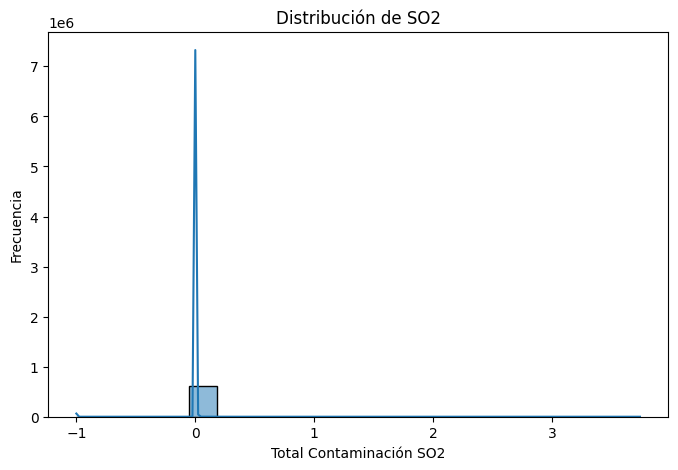

In [67]:
# Crear un histograma de la columna "SO2"
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))  # Tamaño del gráfico
sns.histplot(df_measurement["SO2"], bins=20, kde=True)  # Gráfico con curva KDE (densidad)
plt.title("Distribución de SO2")  # Título del gráfico
plt.xlabel("Total Contaminación SO2")  # Etiqueta del eje X
plt.ylabel("Frecuencia")  # Etiqueta del eje Y
plt.show()  # Mostrar gráfico

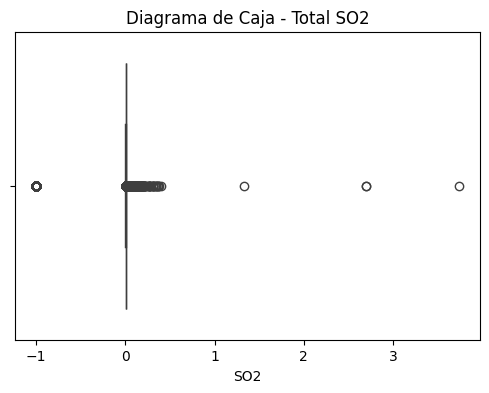

In [68]:
# Boxplot (Diagrama de Caja), Un boxplot nos ayuda a identificar valores extremos (outliers) en los datos.
plt.figure(figsize=(6,4))
sns.boxplot(x=df_measurement["SO2"])
plt.title("Diagrama de Caja - Total SO2")
plt.show()

In [69]:
# Usando IQR (Interquartile Range) para detectar outliers en SO2
# Calcular el IQR para SO2
Q1_SO2= df_measurement["SO2"].quantile(0.25)
Q3_SO2 = df_measurement["SO2"].quantile(0.75)
IQR_SO2 = Q3_SO2 - Q1_SO2

# Definir umbrales para outliers
lower_bound_SO2 = Q1_SO2 - 1.5 * IQR_SO2 # limite inferior
upper_bound_SO2 = Q3_SO2 + 1.5 * IQR_SO2 # limite superior

# filtrar los datos para hallar los outlier
outliers_SO2 = df_measurement[(df_measurement["SO2"] < lower_bound_SO2) | (df_measurement["SO2"] > upper_bound_SO2)]
print(outliers_SO2)

# Cantidad de outlier
cantidad_outliers_SO2 = len(outliers_SO2)
print(f"Cantidad de outliers_SO2: {cantidad_outliers_SO2}")

          Measurement date  Station code   Latitude   Longitude    SO2    NO2  \
230    2021-01-10 14:00:00           204  37.572016  127.005008  0.051  0.007   
231    2021-01-10 15:00:00           204  37.572016  127.005008  0.029  0.012   
400    2021-01-17 16:00:00           204  37.572016  127.005008  0.009  0.083   
401    2021-01-17 17:00:00           204  37.572016  127.005008  0.009  0.082   
402    2021-01-17 18:00:00           204  37.572016  127.005008  0.009  0.083   
...                    ...           ...        ...         ...    ...    ...   
619787 2023-09-16 17:00:00           228  37.544962  127.136792  0.045  0.004   
620354 2023-10-10 14:00:00           228  37.544962  127.136792  0.108  0.007   
620521 2023-10-17 13:00:00           228  37.544962  127.136792  0.122  0.008   
620881 2023-11-01 13:00:00           228  37.544962  127.136792  0.092  0.003   
621287 2023-11-18 11:00:00           228  37.544962  127.136792  0.023  0.013   

           O3   CO   PM10  

In [70]:
# Usando IQR (Interquartile Range) para detectar outliers en O3
# Calcular el IQR para SO2
Q1_O3= df_measurement["O3"].quantile(0.25)
Q3_O3 = df_measurement["O3"].quantile(0.75)
IQR_O3 = Q3_O3 - Q1_O3

# Definir umbrales para outliers
lower_bound_O3 = Q1_O3 - 1.5 * IQR_O3 # limite inferior
upper_bound_O3 = Q3_O3 + 1.5 * IQR_O3 # limite superior

# filtrar los datos para hallar los outlier
outliers_O3 = df_measurement[(df_measurement["O3"] < lower_bound_O3) | (df_measurement["O3"] > upper_bound_O3)]
print(outliers_O3)

# Cantidad de outlier
cantidad_outliers_O3 = len(outliers_O3)
print(f"Cantidad de outliers_O3: {cantidad_outliers_O3}")

          Measurement date  Station code   Latitude   Longitude    SO2    NO2  \
854    2021-02-05 14:00:00           204  37.572016  127.005008 -1.000 -1.000   
855    2021-02-05 15:00:00           204  37.572016  127.005008 -1.000 -1.000   
856    2021-02-05 16:00:00           204  37.572016  127.005008 -1.000 -1.000   
857    2021-02-05 17:00:00           204  37.572016  127.005008 -1.000 -1.000   
858    2021-02-05 18:00:00           204  37.572016  127.005008 -1.000 -1.000   
...                    ...           ...        ...         ...    ...    ...   
619675 2023-09-12 01:00:00           228  37.544962  127.136792 -1.000 -1.000   
619676 2023-09-12 02:00:00           228  37.544962  127.136792 -1.000 -1.000   
619677 2023-09-12 03:00:00           228  37.544962  127.136792 -1.000 -1.000   
620090 2023-09-29 14:00:00           228  37.544962  127.136792  0.004  0.013   
620091 2023-09-29 15:00:00           228  37.544962  127.136792  0.004  0.013   

           O3   CO  PM10  P

In [71]:
# Calculo de la correlación entre SO2 y O3
correlacion_SO2_O3 = df_measurement["SO2"].corr(df_measurement["O3"])
print(f"Correlación entre SO2 y O3: {correlacion_SO2_O3}")

Correlación entre SO2 y O3: 0.7906982637734761


In [72]:
# Calcular la correlación entre "SO2" y "O3", otra forma:
correlacion_SO2_O3 = df_measurement[["SO2", "O3"]].corr()
print(correlacion_SO2_O3)

          SO2        O3
SO2  1.000000  0.790698
O3   0.790698  1.000000


# Matriz de Correlación

In [73]:
# calculo de la matriz de correlación, para ello debemos excluir en primer lugar las columnas no numéricas (fecha)
numeric_columns = df_measurement.select_dtypes(include=['number']).columns
matriz_correlacion_df_measurement = df_measurement[numeric_columns].corr()
print(matriz_correlacion_df_measurement)

              Station code  Latitude  Longitude       SO2       NO2        O3  \
Station code      1.000000 -0.495615   0.049264  0.031512  0.023045  0.022350   
Latitude         -0.495615  1.000000   0.309475 -0.009980 -0.022551 -0.002206   
Longitude         0.049264  0.309475   1.000000  0.012993  0.007576  0.005088   
SO2               0.031512 -0.009980   0.012993  1.000000  0.694126  0.790698   
NO2               0.023045 -0.022551   0.007576  0.694126  1.000000  0.774785   
O3                0.022350 -0.002206   0.005088  0.790698  0.774785  1.000000   
CO               -0.035953  0.057503   0.035085  0.297424  0.236723  0.177064   
PM10              0.029206 -0.022149  -0.023051  0.046651  0.053607  0.036097   
PM2.5             0.017362 -0.024358  -0.021216  0.046153  0.056513  0.031983   
año              -0.003494  0.012758  -0.006830 -0.053924 -0.040385 -0.036583   
mes              -0.007286  0.011464  -0.003902 -0.042942 -0.046222 -0.052705   
día               0.000095  

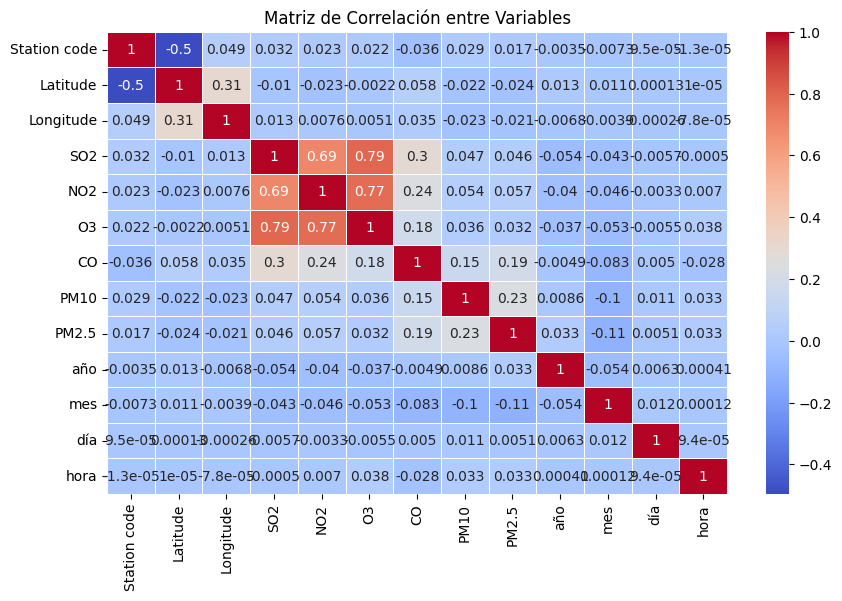

In [74]:
# creamos un heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(matriz_correlacion_df_measurement, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables")
plt.show()

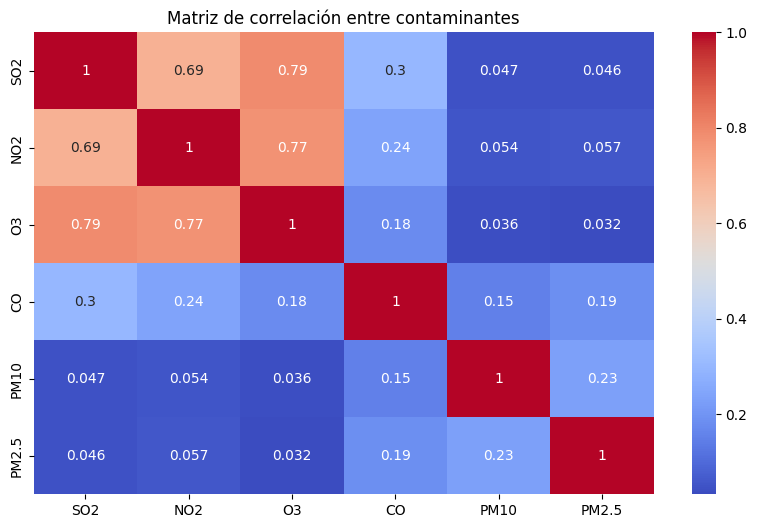

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df_measurement[['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre contaminantes')
plt.show()

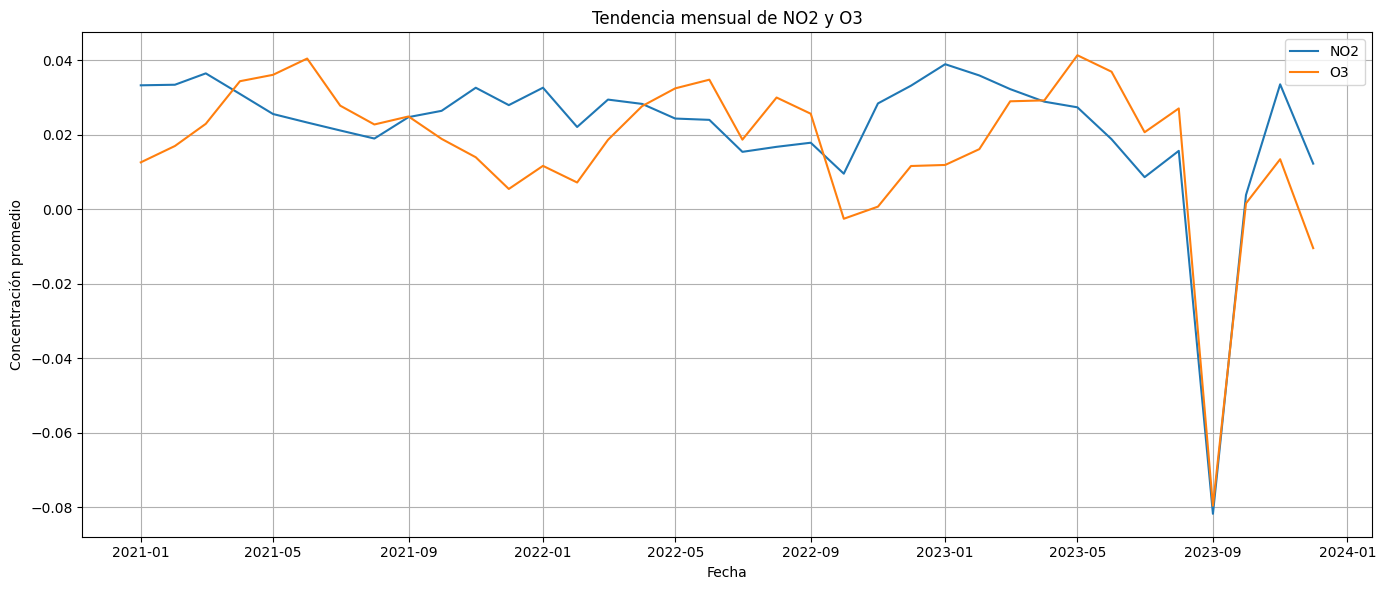

In [76]:
# debido a que la correlacición entre NO2 y O3 es la mas elevada = 0,77, vamos a graficar su concentración promedio a lo largo del tiempo para ambas a fin de poder visualizar su tendencia.
# Preparación de datos:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que la columna de fecha esté en formato datetime
df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Visualización mensual: Promedio de NO2 y O3 por mes

# Agrupar por año y mes para obtener el promedio mensual
# se han cambiado las columnas 'year' and 'month' por las correctas 'año' and 'mes'
df_monthly = df_measurement.groupby(['año', 'mes'])[['NO2', 'O3']].mean().reset_index()

# Crear columna de fecha mensual para el eje x
#Cambia los nombres de las columnas temporalmente a 'year', 'month', y agrega 'day'=1 así:
df_monthly['fecha'] = pd.to_datetime(df_monthly[['año', 'mes']].rename(columns={'año': 'year', 'mes': 'month'}).assign(day=1))

# Gráfica
plt.figure(figsize=(14,6))
sns.lineplot(data=df_monthly, x='fecha', y='NO2', label='NO2')
sns.lineplot(data=df_monthly, x='fecha', y='O3', label='O3')
plt.title('Tendencia mensual de NO2 y O3')
plt.xlabel('Fecha')
plt.ylabel('Concentración promedio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

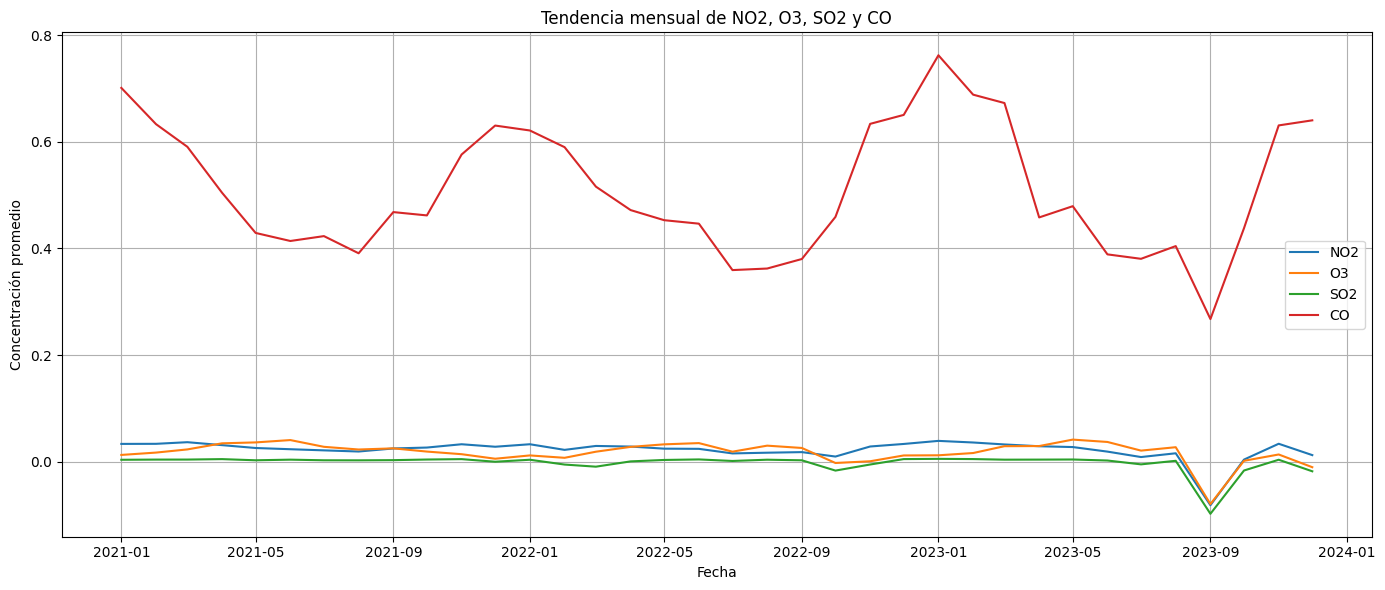

In [77]:
# graficamos todos los contaminantes a fin de comparar sus tendencias a lo largo del tiempo:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que la columna de fecha esté en formato datetime
df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Agrupar por año y mes para obtener el promedio mensual de NO2, O3, SO2 y CO
df_monthly = df_measurement.groupby(['año', 'mes'])[['NO2', 'O3', 'SO2', 'CO']].mean().reset_index()

# Crear columna de fecha mensual para el eje x
df_monthly['fecha'] = pd.to_datetime(df_monthly[['año', 'mes']].rename(columns={'año': 'year', 'mes': 'month'}).assign(day=1))

# Gráfica
plt.figure(figsize=(14,6))
sns.lineplot(data=df_monthly, x='fecha', y='NO2', label='NO2')
sns.lineplot(data=df_monthly, x='fecha', y='O3', label='O3')
sns.lineplot(data=df_monthly, x='fecha', y='SO2', label='SO2')
sns.lineplot(data=df_monthly, x='fecha', y='CO', label='CO')
plt.title('Tendencia mensual de NO2, O3, SO2 y CO')
plt.xlabel('Fecha')
plt.ylabel('Concentración promedio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

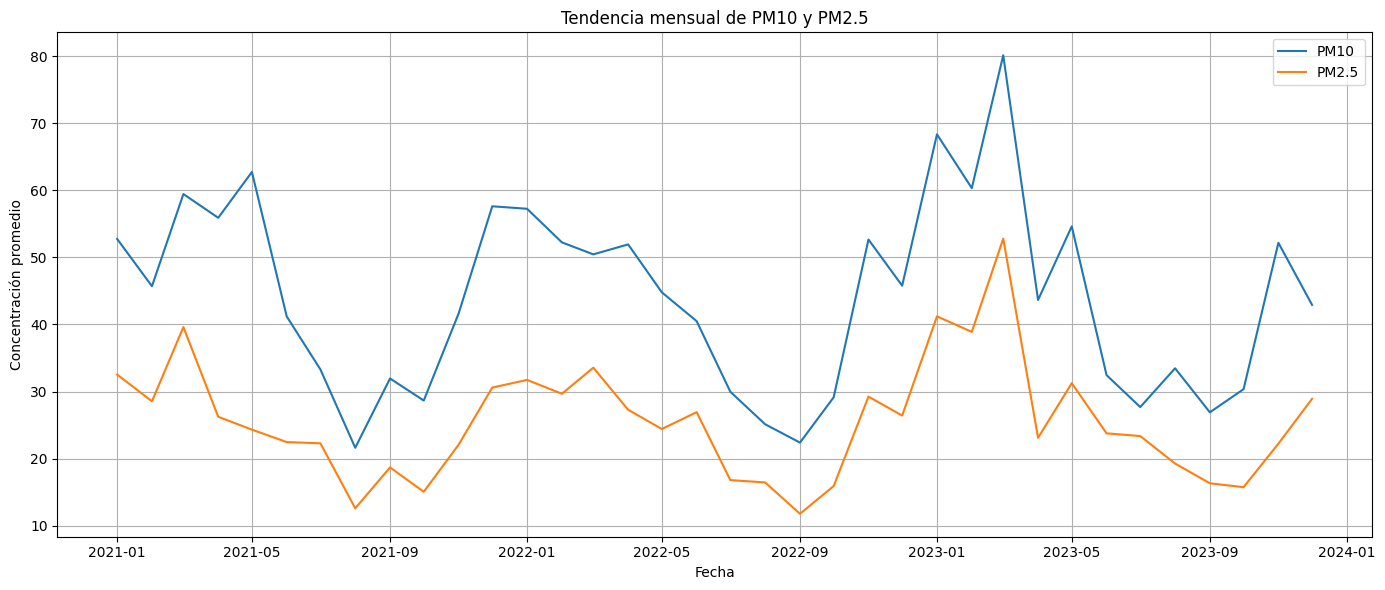

In [78]:
# Ahora visualizaremos las tendencias PM10 y PM2.5

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que la columna de fecha esté en formato datetime
df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Agrupar por año y mes para obtener el promedio mensual de PM10 y PM2.5
df_monthly = df_measurement.groupby(['año', 'mes'])[['PM10', 'PM2.5']].mean().reset_index()

# Crear columna de fecha mensual para el eje x
df_monthly['fecha'] = pd.to_datetime(df_monthly[['año', 'mes']].rename(columns={'año': 'year', 'mes': 'month'}).assign(day=1))

# Gráfica
plt.figure(figsize=(14,6))
sns.lineplot(data=df_monthly, x='fecha', y='PM10', label='PM10')
sns.lineplot(data=df_monthly, x='fecha', y='PM2.5', label='PM2.5')
plt.title('Tendencia mensual de PM10 y PM2.5')
plt.xlabel('Fecha')
plt.ylabel('Concentración promedio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Tarea Nº 2:

Predecir las concentraciones horarias de contaminantes para las siguientes estaciones y períodos, suponiendo mediciones sin errores:



1.   Station code: 206 | pollutant: SO2   | Period: 2023-07-01 00:00:00 - 2023-07-31 23:00:00
2.   Station code: 211 | pollutant: NO2   | Period: 2023-08-01 00:00:00 - 2023-08-31 23:00:00
3.   Station code: 217 | pollutant: O3    | Period: 2023-09-01 00:00:00 - 2023-09-30 23:00:00
4.   Station code: 219 | pollutant: CO    | Period: 2023-10-01 00:00:00 - 2023-10-31 23:00:00
5.   Station code: 225 | pollutant: PM10  | Period: 2023-11-01 00:00:00 - 2023-11-30 23:00:00
6.   Station code: 228 | pollutant: PM2.5 | Period: 2023-12-01 00:00:00 - 2023-12-31 23:00:00

# Variable objetivo (y): variables dependientes

1.   pollutant: SO2
2.   pollutant: NO2
3.   pollutant: O3
4.   pollutant: CO
5.   pollutant: PM10
6.   pollutant: PM2.5

# Tarea Nº 2: "Modelos de Regresión:

# Modelo 1: Predicción SO2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Nos aseguramos que la columna 'Measurement date' está en formato datetime

df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Filtramos el DataFrame por estación y contaminante:

station_code_SO2 = 206
pollutant_SO2 = 'SO2'

df_SO2 = df_measurement[(df_measurement['Station code'] == station_code_SO2) & (df_measurement[pollutant_SO2].notna())]

# Definimos variables independientes o características (X_SO2) y variable dependiente u objetivo (y_SO2)

X_SO2 = df_SO2[['Station code', 'año', 'mes', 'día', 'hora', 'NO2', 'CO', 'O3', 'PM10', 'PM2.5']]
y_SO2 = df_SO2[pollutant_SO2]

# Dividir en entrenamiento y prueba

X_train_SO2, X_test_SO2, y_train_SO2, y_test_SO2 = train_test_split(X_SO2, y_SO2, test_size=0.2, random_state=42)

# Crear y evaluar modelos:

modelos_SO2 = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión Lasso': Lasso(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

resultados_SO2 = {}

for nombre, modelo in modelos_SO2.items():
    modelo.fit(X_train_SO2, y_train_SO2)
    y_pred_SO2 = modelo.predict(X_test_SO2)
    mse = mean_squared_error(y_test_SO2, y_pred_SO2)
    r2 = r2_score(y_test_SO2, y_pred_SO2)
    resultados_SO2[nombre] = {'MSE': mse, 'R²': r2}

# Mostrar resultados:

print("\nResultados para la predicción de SO2:")
for nombre, metrics in resultados_SO2.items():
    print(f"{nombre}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}\n")



Resultados para la predicción de SO2:
Regresión Lineal:
  MSE: 0.0001080878462770056
  R²: 0.9883069362183751

Regresión Ridge:
  MSE: 0.00010688297261311571
  R²: 0.9884372807953644

Regresión Lasso:
  MSE: 0.009243797656029127
  R²: -4.341833004906093e-06

Árbol de Decisión:
  MSE: 1.345450335725854e-06
  R²: 0.999854447681839

Random Forest:
  MSE: 8.448566797869842e-07
  R²: 0.9999086024619478

SVR:
  MSE: 0.014804170495222684
  R²: -0.6015316781412792



In [ ]:
# Predicciones SO2 usando el modelo Random Forest, con mejor evaluación

modelo_SO2_ganador = modelos_SO2['Random Forest']
y_pred_SO2_ganador = modelo_SO2_ganador.predict(X_test_SO2)

print("Predicciones del modelo Random Forest (SO2):")
print(y_pred_SO2_ganador)

# Crear DataFrame con comparaciones:

# Comparar valores reales vs predichos
df_comparacion_SO2 = pd.DataFrame({
    'Real': y_test_SO2.values,
    'Pred': y_pred_SO2_ganador
})

print("Comparación Real vs Predicho (SO2):")
print(df_comparacion_SO2.head())

Predicciones del modelo Random Forest (SO2):
[ 0.00333 -1.       0.00319 ...  0.0043   0.00446  0.00263]
Comparación Real vs Predicho (SO2):
    Real     Pred
0  0.003  0.00333
1 -1.000 -1.00000
2  0.003  0.00319
3  0.003  0.00407
4  0.003  0.00307


# Opcional:

Trataremos de optimizar el modelo de Random Forest (El mejor evaluado) variando los hiperparámetros a través de la herramienta: GridsearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# 1. Definir la grilla de hiperparámetros a probar

param_grid_rf_SO2 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
}

# 2. Crear el objeto GridSearchCV

grid_rf_SO2 = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf_SO2,
    cv=3,
    scoring='r2',
    n_jobs=-1  # usa todos los núcleos disponibles
)

# 3. Entrenar el GridSearch con los datos de SO2

grid_rf_SO2.fit(X_train_SO2, y_train_SO2)

# 4. Obtener el mejor modelo optimizado

modelo_optimizado_rf_SO2 = grid_rf_SO2.best_estimator_ # aquí, guardamos el mejor modelo optimizado

# 5. Hacer predicciones con el modelo optimizado

y_pred_rf_optim_SO2 = modelo_optimizado_rf_SO2.predict(X_test_SO2)

# 6. Evaluar el modelo optimizado

print("🔧 Random Forest Optimizado (SO2):")
print(f"  Mejor R²: {r2_score(y_test_SO2, y_pred_rf_optim_SO2)}")
print(f"  Mejor MSE: {mean_squared_error(y_test_SO2, y_pred_rf_optim_SO2)}")
print(f"  Mejores parámetros: {grid_rf_SO2.best_params_}")

🔧 Random Forest Optimizado (SO2):
  Mejor R²: 0.9999191519234848
  Mejor MSE: 7.473400153602818e-07
  Mejores parámetros: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}


Nota: cuando no se definen los hiperparámetros manualmente, por defecto se aplican los valores preconfigurados en scikit-learn para c/u de los modelos, para el Modelo Random Forest, son los siguientes:

RandomForestRegressor(
    n_estimators=100,         # Número de árboles en el bosque
    criterion='squared_error',# Criterio de división
    max_depth=None,           # Sin profundidad máxima (los árboles crecen hasta que no pueden más)
    min_samples_split=2,      # Mínimo de muestras para dividir un nodo
    min_samples_leaf=1,       # Mínimo de muestras en una hoja
    random_state=None,        # No se fija la aleatoriedad
)

SVR(
    kernel='rbf',   # Función núcleo radial (RBF) por defecto
    C=1.0,          # Regularización
    epsilon=0.1     # Margen de tolerancia para errores
)

# Modelo 1: pollutant: SO2

# Predicción:
Station code: 206 | pollutant: SO2 | Period: 2023-07-01 00:00:00 - 2023-07-31

In [ ]:
# Como pudimos observar, aunque se intentó optimizar el modelo Random Forest a través de la herramienta GridSearchCV, la opción encontrada por ésta herramienta: modelo_optimizado_rf_SO2,
# no superó la evaluación del Modelo Random Forest inicial: modelo_SO2_ganador (parametros predeterminados scikit-learn), en tal sentido, las predicicciones se harán con modelo_SO2_ganador (mejor mdelo)

# Predicciones modelo Random Forest para los valores: Station code: 206 | pollutant: SO2 | Period: 2023-07-01 00:00:00 - 2023-07-31 23:00:00:

import pandas as pd

# Crear fecha y base de datos para julio

fechas_julio = pd.date_range(start='2023-07-01 00:00:00', end='2023-07-31 23:00:00', freq='h')

# Crear DataFrame base con características requeridas

df_SO2_julio = pd.DataFrame({
    'fecha': fechas_julio,    # la lista completa de fechas y horas que creamos antes
    'Station code': station_code_SO2,  # Recuerda: definido como 206;  Es el número del código de la estación donde se mide la calidad del aire. Se repite para todas las filas.
    'año': fechas_julio.year,   # extraído de cada fecha. Siempre será 2023 en este caso
    'mes': fechas_julio.month,  # extraído de cada fecha. Siempre será 7 (agosto)
    'día': fechas_julio.day,    # extraído de cada fecha. Va de 1 a 31.
    'hora': fechas_julio.hour,  # extraída de cada fecha. Va de 0 a 23 (porque son horas del día)
    # Valores promedio de otros contaminantes
    'NO2': [df_measurement['NO2'].mean()] * len(fechas_julio), # df_measurement['NO2'].mean() significa: "Calcula el promedio de la columna NO2 del DataFrame df_measurement" y luego ese promedio lo repetimos para cada fila del mes de julio con: * len(fechas_julio)
    'CO': [df_measurement['CO'].mean()] * len(fechas_julio),
    'O3': [df_measurement['O3'].mean()] * len(fechas_julio),
    'PM10': [df_measurement['PM10'].mean()] * len(fechas_julio),
    'PM2.5': [df_measurement['PM2.5'].mean()] * len(fechas_julio)
})

# Modelado

# -------- Modelo Inicial ganador --------
columnas_SO2_ganador = modelo_SO2_ganador.feature_names_in_  # Columnas que el modelo espera; .feature_names_in_ : lista de columnas que el modelo usó cuando fue entrenado.
df_SO2_julio_ganador = df_SO2_julio[columnas_SO2_ganador].copy()
df_SO2_julio['pred_SO2_ganador'] = modelo_SO2_ganador.predict(df_SO2_julio_ganador)


# -------- Modelo Optimizado por GridSearchCV (opcional) --------

columnas_SO2_opt = modelo_optimizado_rf_SO2.feature_names_in_ # .feature_names_in_ : lista de columnas que el modelo usó cuando fue entrenado.
df_SO2_julio_opt = df_SO2_julio[columnas_SO2_opt].copy()
df_SO2_julio['pred_SO2_rf_optimizado'] = modelo_optimizado_rf_SO2.predict(df_SO2_julio_opt)

# Mostramos ambas predicciones (opcional)
# df_comparacion_final = df_SO2_julio[['fecha', 'pred_SO2_ganador', 'pred_SO2_rf_optimizado']]
# print("Comparación de predicciones para julio 2023:")
# print(df_comparacion_final.head())

#---------------------------------------------------------------------------

# Seleccionar predicción final según el mejor modelo

# Como el modelo inicial de Random Forest tuvo mejor rendimiento, usamos sus predicciones
df_SO2_julio_final = df_SO2_julio[['fecha', 'pred_SO2_ganador']]
print("Predicción final con modelo ganador (Random Forest Inicial):")
print(df_SO2_julio_final.head(23))


Predicción final con modelo ganador (Random Forest Inicial):
                 fecha  pred_SO2_ganador
0  2023-07-01 00:00:00           0.00351
1  2023-07-01 01:00:00           0.00348
2  2023-07-01 02:00:00           0.00349
3  2023-07-01 03:00:00           0.00347
4  2023-07-01 04:00:00           0.00351
5  2023-07-01 05:00:00           0.00355
6  2023-07-01 06:00:00           0.00357
7  2023-07-01 07:00:00           0.00330
8  2023-07-01 08:00:00           0.00325
9  2023-07-01 09:00:00           0.00322
10 2023-07-01 10:00:00           0.00317
11 2023-07-01 11:00:00           0.00318
12 2023-07-01 12:00:00           0.00313
13 2023-07-01 13:00:00           0.00315
14 2023-07-01 14:00:00           0.00316
15 2023-07-01 15:00:00           0.00326
16 2023-07-01 16:00:00           0.00309
17 2023-07-01 17:00:00           0.00305
18 2023-07-01 18:00:00           0.00312
19 2023-07-01 19:00:00           0.00302
20 2023-07-01 20:00:00           0.00302
21 2023-07-01 21:00:00           0.00

# Modelo 2: Predicción del NO2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Nos aseguramos que la columna 'Measurement date' está en formato datetime

df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Filtramos el DataFrame por estación y contaminante:

station_code_NO2 = 211
pollutant_NO2 = 'NO2'

df_NO2 = df_measurement[(df_measurement['Station code'] == station_code_NO2) & (df_measurement[pollutant_NO2].notna())]

# Definimos variables independientes o características (X_NO2) y variable dependiente u objetivo (y_NO2)

X_NO2 = df_NO2[['Station code', 'año', 'mes', 'día', 'hora', 'SO2', 'CO', 'O3', 'PM10', 'PM2.5']]
y_NO2 = df_NO2[pollutant_NO2]

# Dividir en entrenamiento y prueba

X_train_NO2, X_test_NO2, y_train_NO2, y_test_NO2 = train_test_split(X_NO2, y_NO2, test_size=0.2, random_state=42)

# Crear y evaluar modelos:

modelos_NO2 = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión Lasso': Lasso(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

resultados_NO2 = {}

for nombre, modelo in modelos_NO2.items():
    modelo.fit(X_train_NO2, y_train_NO2)
    y_pred_NO2 = modelo.predict(X_test_NO2)
    mse = mean_squared_error(y_test_NO2, y_pred_NO2)
    r2 = r2_score(y_test_NO2, y_pred_NO2)
    resultados_NO2[nombre] = {'MSE': mse, 'R²': r2}

# Mostrar resultados:

print("\nResultados para la predicción de NO2:")
for nombre, metrics in resultados_NO2.items():
    print(f"{nombre}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}\n")


Resultados para la predicción de NO2:
Regresión Lineal:
  MSE: 0.001141071194101069
  R²: 0.6003340071938468

Regresión Ridge:
  MSE: 0.0011640274638171284
  R²: 0.5922934568981025

Regresión Lasso:
  MSE: 0.0028568500388336006
  R²: -0.0006262650142720982

Árbol de Decisión:
  MSE: 0.0005769708781362005
  R²: 0.7979130136466157

Random Forest:
  MSE: 0.00028858380770609317
  R²: 0.898922052707239

SVR:
  MSE: 0.005761718464244097
  R²: -1.0180712142994444



In [ ]:
# Predicciones NO2 usando el modelo Random Forest (mejor evaluación inicial) con datos de prueba

modelo_NO2_ganador = modelos_NO2['Random Forest']
y_pred_NO2_ganador = modelo_NO2_ganador.predict(X_test_NO2)

print("Predicciones del modelo Random Forest (NO2):")
print(y_pred_NO2_ganador)

# Crear DataFrame con comparaciones:

# Comparar valores reales vs predichos

df_comparacion_NO2 = pd.DataFrame({
    'Real': y_test_NO2.values,
    'Pred': y_pred_NO2_ganador
})

print("Comparación Real vs Predicho (NO2):")
print(df_comparacion_NO2.head())


# Mostrar comparaciones con 5 decimales forzadamente
print(df_comparacion_NO2.head())

Predicciones del modelo Random Forest (NO2):
[0.01737 0.02754 0.01313 ... 0.02305 0.0184  0.02835]
Comparación Real vs Predicho (NO2):
    Real     Pred
0  0.015  0.01737
1  0.032  0.02754
2  0.016  0.01313
3  0.016  0.02711
4  0.024  0.03362
    Real     Pred
0  0.015  0.01737
1  0.032  0.02754
2  0.016  0.01313
3  0.016  0.02711
4  0.024  0.03362


# Opcional:
Trataremos de optimizar el modelo de Random Forest (El mejor evaluado) y el del árbol de Decisión (2do mejor evaluado) variando los hiperparámetros a través de la herramienta: GridsearchCV

In [ ]:
# verificaremos si se puede optimizar tanto el modelo Random Forest (mejor evaluado): MSE: 0.00029309103411738355 R²: 0.8973433737187736;
# así como el modelo árbol de decisión (segundo mejor evaluado):  MSE: 0.0005755739247311827 y R²: 0.7984023036860162

# Hiperparámetros para probar con param_grid
# Primero definimos los rangos de valores que queremos probar para cada modelo.

from sklearn.model_selection import GridSearchCV

# Parámetros para Árbol de Decisión
parametros_dt_NO2 = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Parámetros para Random Forest
parametros_rf_NO2 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Utilizamos la herramienta GridSearchCV para ambos modelos:

# GridSearch para Árbol de Decisión
grid_dt_NO2 = GridSearchCV(DecisionTreeRegressor(), param_grid=parametros_dt_NO2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_dt_NO2.fit(X_train_NO2, y_train_NO2)
modelo_optimizado_dt_NO2 = grid_dt_NO2.best_estimator_

# GridSearch para Random Forest
grid_rf_NO2 = GridSearchCV(RandomForestRegressor(), param_grid=parametros_rf_NO2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf_NO2.fit(X_train_NO2, y_train_NO2)
modelo_optimizado_rf_NO2 = grid_rf_NO2.best_estimator_

# Evaluar los modelos optimizados:

# Evaluar Árbol de Decisión optimizado
y_pred_dt_opt_NO2 = modelo_optimizado_dt_NO2.predict(X_test_NO2)
mse_dt_opt_NO2 = mean_squared_error(y_test_NO2, y_pred_dt_opt_NO2)
r2_dt_opt_NO2 = r2_score(y_test_NO2, y_pred_dt_opt_NO2)

# Evaluar Random Forest optimizado
y_pred_rf_opt_NO2 = modelo_optimizado_rf_NO2.predict(X_test_NO2)
mse_rf_opt_NO2 = mean_squared_error(y_test_NO2, y_pred_rf_opt_NO2)
r2_rf_opt_NO2 = r2_score(y_test_NO2, y_pred_rf_opt_NO2)

# Mostrar resultados optimizados
print("Árbol de Decisión Optimizado:")
print(f"  MSE: {mse_dt_opt_NO2}")
print(f"  R²: {r2_dt_opt_NO2}\n")

print("Random Forest Optimizado:")
print(f"  MSE: {mse_rf_opt_NO2}")
print(f"  R²: {r2_rf_opt_NO2}\n")

# Opcional: Ver hiperparámetros seleccionados
print("Mejores parámetros para Árbol de Decisión:")
print(grid_dt_NO2.best_params_)
print("Mejores parámetros para Random Forest:")
print(grid_rf_NO2.best_params_)

Árbol de Decisión Optimizado:
  MSE: 0.00032515661204348827
  R²: 0.8861122418639065

Random Forest Optimizado:
  MSE: 0.0003196447908300951
  R²: 0.8880427852943331

Mejores parámetros para Árbol de Decisión:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5}
Mejores parámetros para Random Forest:
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


# Modelo 2  pollutant: NO2

Predicción: code: 211 | pollutant: NO2 | Period: 2023-08-01 00:00:00 - 2023-08-31 23:00:

In [ ]:
# Como pudimos observar, a través variando los hiperparámetros con la herramienta GridSearchCV, No logró encontrar un modelo Random Forest que haya mejorado al modelo inicial (Hiperparametros predeterminados por scikilearn),
# en tal sentido, utilizaremos el modelo (Random Forest inicial) para el cálculo de las predicciones: code: 211 | pollutant: NO2 | Period: 2023-08-01 00:00:00 - 2023-08-31 23:00:0

import pandas as pd

# Crear rango de fechas para agosto 2023
# creamos una lista de fechas y horas, desde el 1 de agosto hasta el 31 de agosto de 2023, hora por hora:
# start='2023-08-01 00:00:00' = comienzo: 1 de agosto a la medianoche
# end='2023-08-31 23:00:00' = final: 31 de agosto a las 11 de la noche
# freq='h' = queremos que cada paso sea una hora

fechas_agosto = pd.date_range(start='2023-08-01 00:00:00', end='2023-08-31 23:00:00', freq='h') # El resultado es una lista con todas las fechas y horas de agosto.

# Creamos una tabla de datos base (DataFrame) con las características necesarias
df_NO2_agosto = pd.DataFrame({
    'fecha': fechas_agosto, # la lista completa de fechas y horas que creamos antes
    'Station code': station_code_NO2, # Es el número del código de la estación donde se mide la calidad del aire. Se repite para todas las filas (se definio = 211).
    'año': fechas_agosto.year, # extraído de cada fecha. Siempre será 2023 en este caso
    'mes': fechas_agosto.month, # extraído de cada fecha. Siempre será 7 (agosto)
    'día': fechas_agosto.day, # extraído de cada fecha. Va de 1 a 31.
    'hora': fechas_agosto.hour, # extraída de cada fecha. Va de 0 a 23 (porque son horas del día)
    # Agregamos las columnas con los valores promedio de c/u de los contaminantes, sin tomar en cuenta el correspondiente a la función objetivo:
    'SO2': [df_measurement['SO2'].mean()] * len(fechas_agosto), # df_measurement['NO2'].mean() significa: "Calcula el promedio de la columna NO2 del DataFrame df_measurement" y luego ese promedio lo repetimos para cada fila del mes de julio con: * len(fechas_julio)
    'CO': [df_measurement['CO'].mean()] * len(fechas_agosto),
    'O3': [df_measurement['O3'].mean()] * len(fechas_agosto),
    'PM10': [df_measurement['PM10'].mean()] * len(fechas_agosto),
    'PM2.5': [df_measurement['PM2.5'].mean()] * len(fechas_agosto)
})


# Modelado con las modelos mejor evaluados:

# -------- Modelo Inicial ganador --------
columnas_NO2_ganador = modelo_NO2_ganador.feature_names_in_  # Columnas que el modelo espera; .feature_names_in_ : lista de columnas que el modelo usó cuando fue entrenado.
df_NO2_agosto_ganador = df_NO2_agosto[columnas_NO2_ganador].copy()
df_NO2_agosto['pred_NO2_ganador'] = modelo_NO2_ganador.predict(df_NO2_agosto_ganador)


# -------- Modelo Optimizado por GridSearchCV  --------
columnas_NO2_opt = modelo_optimizado_rf_NO2.feature_names_in_ # .feature_names_in_ : lista de columnas que el modelo usó cuando fue entrenado.
df_NO2_agosto_opt = df_NO2_agosto[columnas_NO2_opt].copy()
df_NO2_agosto['pred_NO2_rf_optimizado'] = modelo_optimizado_rf_NO2.predict(df_NO2_agosto_opt)

# Mostramos ambas predicciones (opcional)
# df_comparacion_final = df_NO2_agosto[['fecha', 'pred_NO2_ganador', 'pred_NO2_rf_optimizado']]
# print("Comparación de predicciones para agosto 2023:")
# print(df_comparacion_final.head())

#---------------------------------------------------------------------------

# Seleccionar predicción final según el mejor modelo
# como el modelo Random Forest por inicial tuvo el mejor rendimiento, usaremos sus predicciones

df_NO2_agosto_final = df_NO2_agosto[['fecha', 'pred_NO2_ganador']]
print("Predicción final con modelo ganador (Random Forest):")
print(df_NO2_agosto_final.head(24).to_string(formatters={
    'pred_NO2_ganador': '{:.5f}'.format
}))


Predicción final con modelo ganador (Random Forest):
                 fecha pred_NO2_ganador
0  2023-08-01 00:00:00          0.02473
1  2023-08-01 01:00:00          0.02454
2  2023-08-01 02:00:00          0.02430
3  2023-08-01 03:00:00          0.02438
4  2023-08-01 04:00:00          0.02477
5  2023-08-01 05:00:00          0.02445
6  2023-08-01 06:00:00          0.02472
7  2023-08-01 07:00:00          0.02517
8  2023-08-01 08:00:00          0.02611
9  2023-08-01 09:00:00          0.02586
10 2023-08-01 10:00:00          0.02601
11 2023-08-01 11:00:00          0.02707
12 2023-08-01 12:00:00          0.02737
13 2023-08-01 13:00:00          0.02708
14 2023-08-01 14:00:00          0.02749
15 2023-08-01 15:00:00          0.02828
16 2023-08-01 16:00:00          0.02884
17 2023-08-01 17:00:00          0.02877
18 2023-08-01 18:00:00          0.02919
19 2023-08-01 19:00:00          0.02923
20 2023-08-01 20:00:00          0.02871
21 2023-08-01 21:00:00          0.02805
22 2023-08-01 22:00:00     

# Modelo 3: Predicción O3

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Nos aseguramos que la columna 'Measurement date' está en formato datetime

df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Filtramos el DataFrame por estación y contaminante:

station_code_O3 = 217
pollutant_O3 = 'O3'

df_O3 = df_measurement[(df_measurement['Station code'] == station_code_O3) & (df_measurement[pollutant_O3].notna())]

# Definimos variables independientes o características (X_O3) y variable dependiente u objetivo (y_O3)

X_O3 = df_O3[['Station code', 'año', 'mes', 'día', 'hora', 'SO2', 'NO2', 'CO', 'PM10', 'PM2.5']]
y_O3 = df_O3[pollutant_O3]

# Dividir en entrenamiento y prueba

X_train_O3, X_test_O3, y_train_O3, y_test_O3 = train_test_split(X_O3, y_O3, test_size=0.2, random_state=42)

# Crear y evaluar modelos:

modelos_O3 = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión Lasso': Lasso(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

resultados_O3 = {}

for nombre, modelo in modelos_O3.items():
    modelo.fit(X_train_O3, y_train_O3)
    y_pred_O3 = modelo.predict(X_test_O3)
    mse = mean_squared_error(y_test_O3, y_pred_O3)
    r2 = r2_score(y_test_O3, y_pred_O3)
    resultados_O3[nombre] = {'MSE': mse, 'R²': r2}

# Mostrar resultados:

print("\nResultados para la predicción de O3:")
for nombre, metrics in resultados_NO2.items():
    print(f"{nombre}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}\n")


Resultados para la predicción de O3:
Regresión Lineal:
  MSE: 0.001141071194101069
  R²: 0.6003340071938468

Regresión Ridge:
  MSE: 0.0011640274638171284
  R²: 0.5922934568981025

Regresión Lasso:
  MSE: 0.0028568500388336006
  R²: -0.0006262650142720982

Árbol de Decisión:
  MSE: 0.0005769708781362005
  R²: 0.7979130136466157

Random Forest:
  MSE: 0.00028858380770609317
  R²: 0.898922052707239

SVR:
  MSE: 0.005761718464244097
  R²: -1.0180712142994444



In [ ]:
# Predicciones O3 usando el modelo Random Forest (mejor evaluación) usando los datos de prueba

modelo_O3_ganador = modelos_O3['Random Forest']
y_pred_O3_ganador = modelo_O3_ganador.predict(X_test_O3)

print("Predicciones del modelo Random Forest (O3):")
print(y_pred_O3_ganador)

# Crear DataFrame con comparaciones:

# Comparar valores reales vs predichos
df_comparacion_O3 = pd.DataFrame({
    'Real': y_test_O3.values,
    'Pred': y_pred_O3_ganador
})

print("Comparación Real vs Predicho (O3):")
print(df_comparacion_O3.head())

Predicciones del modelo Random Forest (O3):
[0.00178 0.02732 0.01409 ... 0.02992 0.05151 0.00218]
Comparación Real vs Predicho (O3):
    Real     Pred
0  0.002  0.00178
1  0.022  0.02732
2  0.018  0.01409
3  0.028  0.03164
4  0.002  0.00205


# Modelo 3: pollutant: O3

# Predicción:
Station code: 217 | pollutant: O3 | Period: 2023-09-01 00:00:00 - 2023-09-30 23:00:00

In [ ]:
# Debido a: fuerte correlacción entre SO2, NO2 y O3; No hubo mejora utilizando la herramienta GridSearchCV para los modelos: 1 y 2; Muy pesado el programa GridSearchCV;
# no intentaremos buscar una posible mejora para el Modelo 3 con la herramienta GridSearchCV, sino que simplemente tomaremos la mejor evalución que hicimos en el paso anterior,
# en tal sentimos procederemos a calcular las predicciones con el modelo ganador (Random Forrest)

import pandas as pd

# Crear fecha y base de datos para septiembre

fechas_septiembre = pd.date_range(start='2023-09-01 00:00:00', end='2023-09-30 23:00:00', freq='h')

# Crear DataFrame base con características requeridas

df_O3_septiembre = pd.DataFrame({
    'fecha': fechas_septiembre,    # la lista completa de fechas y horas que creamos antes
    'Station code': station_code_O3,  # Recuerda: definido como 217;  Es el número del código de la estación donde se mide la calidad del aire. Se repite para todas las filas.
    'año': fechas_septiembre.year,   # extraído de cada fecha. Siempre será 2023 en este caso
    'mes': fechas_septiembre.month,  # extraído de cada fecha. Siempre será 9 (septiembre)
    'día': fechas_septiembre.day,    # extraído de cada fecha. Va de 1 a 30.
    'hora': fechas_septiembre.hour,  # extraída de cada fecha. Va de 0 a 23 (porque son horas del día)
    # Valores promedio de otros contaminantes
    'SO2': [df_measurement['SO2'].mean()] * len(fechas_septiembre), # df_measurement['NO2'].mean() significa: "Calcula el promedio de la columna NO2 del DataFrame df_measurement" y luego ese promedio lo repetimos para cada fila del mes de julio con: * len(fechas_julio)
    'NO2': [df_measurement['NO2'].mean()] * len(fechas_septiembre),
    'CO': [df_measurement['CO'].mean()] * len(fechas_septiembre),
    'PM10': [df_measurement['PM10'].mean()] * len(fechas_septiembre),
    'PM2.5': [df_measurement['PM2.5'].mean()] * len(fechas_septiembre)
})

# Modelado

# -------- Modelo ganador --------
columnas_O3_ganador = modelo_O3_ganador.feature_names_in_  # Columnas que el modelo espera; .feature_names_in_ : lista de columnas que el modelo usó cuando fue entrenado.
df_O3_septiembre_ganador = df_O3_septiembre[columnas_O3_ganador].copy()
df_O3_septiembre['pred_O3_ganador'] = modelo_O3_ganador.predict(df_O3_septiembre_ganador)

# Como el modelo Random Forest tuvo mejor rendimiento, usamos sus predicciones
df_O3_septiembre_final = df_O3_septiembre[['fecha', 'pred_O3_ganador']]
print("Predicción final con modelo ganador (Random Forest):")
print(df_O3_septiembre_final.head(23))

Predicción final con modelo ganador (Random Forest):
                 fecha  pred_O3_ganador
0  2023-09-01 00:00:00          0.02134
1  2023-09-01 01:00:00          0.02086
2  2023-09-01 02:00:00          0.01886
3  2023-09-01 03:00:00          0.01757
4  2023-09-01 04:00:00          0.01630
5  2023-09-01 05:00:00          0.01617
6  2023-09-01 06:00:00          0.01699
7  2023-09-01 07:00:00          0.01893
8  2023-09-01 08:00:00          0.02032
9  2023-09-01 09:00:00          0.03557
10 2023-09-01 10:00:00          0.03790
11 2023-09-01 11:00:00          0.04898
12 2023-09-01 12:00:00          0.05029
13 2023-09-01 13:00:00          0.05310
14 2023-09-01 14:00:00          0.05685
15 2023-09-01 15:00:00          0.05738
16 2023-09-01 16:00:00          0.05646
17 2023-09-01 17:00:00          0.05585
18 2023-09-01 18:00:00          0.05487
19 2023-09-01 19:00:00          0.04324
20 2023-09-01 20:00:00          0.03660
21 2023-09-01 21:00:00          0.03368
22 2023-09-01 22:00:00     

# Modelo 4: Predicción del CO

Station code: 219 | pollutant: CO | Period: 2023-10-01 00:00:00 - 2023-10-31 23:00:00

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Nos aseguramos que la columna 'Measurement date' está en formato datetime

df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Filtramos el DataFrame por estación y contaminante:

station_code_CO = 219
pollutant_CO = 'CO'

df_CO = df_measurement[(df_measurement['Station code'] == station_code_CO) & (df_measurement[pollutant_CO].notna())]

# Definimos variables independientes o características (X_CO) y variable dependiente u objetivo (y_CO)

X_CO = df_CO[['Station code', 'año', 'mes', 'día', 'hora', 'SO2', 'NO2', 'O3', 'PM10', 'PM2.5']]
y_CO = df_CO[pollutant_CO]

# Dividir en entrenamiento y prueba

X_train_CO, X_test_CO, y_train_CO, y_test_CO = train_test_split(X_CO, y_CO, test_size=0.2, random_state=42)

# Crear y evaluar modelos:

modelos_CO = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión Lasso': Lasso(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

resultados_CO = {}

for nombre, modelo in modelos_CO.items():
    modelo.fit(X_train_CO, y_train_CO)
    y_pred_CO = modelo.predict(X_test_CO)
    mse = mean_squared_error(y_test_CO, y_pred_CO)
    r2 = r2_score(y_test_CO, y_pred_CO)
    resultados_CO[nombre] = {'MSE': mse, 'R²': r2}

# Mostrar resultados:

print("\nResultados para la predicción de CO:")
for nombre, metrics in resultados_CO.items():
    print(f"{nombre}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}\n")


Resultados para la predicción de CO:
Regresión Lineal:
  MSE: 0.02150678179749466
  R²: 0.7060037490132323

Regresión Ridge:
  MSE: 0.02230444386373298
  R²: 0.6950997625759987

Regresión Lasso:
  MSE: 0.05058614434001898
  R²: 0.3084908319675449

Árbol de Decisión:
  MSE: 0.01291227330240405
  R²: 0.8234900982226202

Random Forest:
  MSE: 0.006305367355546182
  R²: 0.9138060551746113

SVR:
  MSE: 0.04813234363613845
  R²: 0.3420341214472199



In [ ]:
# Predicciones co usando el modelo Random Forest (mejor evaluación) usando los datos de prueba

modelo_CO_ganador = modelos_CO['Random Forest']
y_pred_CO_ganador = modelo_CO_ganador.predict(X_test_CO)

print("Predicciones del modelo Random Forest (CO):")
print(y_pred_CO_ganador)

# Crear DataFrame con comparaciones:

# Comparar valores reales vs predichos
df_comparacion_CO = pd.DataFrame({
    'Real': y_test_CO.values,
    'Pred': y_pred_CO_ganador
})

print("Comparación Real vs Predicho (CO):")
print(df_comparacion_CO.head())

Predicciones del modelo Random Forest (CO):
[0.451 0.376 0.436 ... 0.327 0.483 0.465]
Comparación Real vs Predicho (CO):
   Real   Pred
0   0.3  0.451
1   0.3  0.376
2   0.4  0.436
3   0.6  0.545
4   0.2  0.260


# Modelo 4: pollutant: CO

# Predicción:
Station code: 219 | pollutant: CO | Period: 2023-10-01 00:00:00 - 2023-10-31 23:00:00

In [ ]:
# Debido a: fuerte correlacción entre SO2, NO2 y O3; No hubo mejora utilizando la herramienta GridSearchCV para los modelos: 1 y 2; Muy pesado el programa GridSearchCV;
# no intentaremos buscar una posible mejora para el Modelo 4 con la herramienta GridSearchCV, sino que simplemente tomaremos la mejor evalución que hicimos en el paso anterior,
# en tal sentimos procederemos a calcular las predicciones con el modelo ganador (Random Forrest)

import pandas as pd

# Crear fecha y base de datos para octubre

fechas_octubre = pd.date_range(start='2023-10-01 00:00:00', end='2023-10-31 23:00:00', freq='h')

# Crear DataFrame base con características requeridas

df_CO_octubre = pd.DataFrame({
    'fecha': fechas_octubre,    # la lista completa de fechas y horas que creamos antes
    'Station code': station_code_CO,  # Recuerda: definido como 219;  Es el número del código de la estación donde se mide la calidad del aire. Se repite para todas las filas.
    'año': fechas_octubre.year,   # extraído de cada fecha. Siempre será 2023 en este caso
    'mes': fechas_octubre.month,  # extraído de cada fecha. Siempre será 10 (octumbre)
    'día': fechas_octubre.day,    # extraído de cada fecha. Va de 1 a 31.
    'hora': fechas_octubre.hour,  # extraída de cada fecha. Va de 0 a 23 (porque son horas del día)
    # Valores promedio de otros contaminantes
    'SO2': [df_measurement['SO2'].mean()] * len(fechas_octubre), # df_measurement['NO2'].mean() significa: "Calcula el promedio de la columna NO2 del DataFrame df_measurement" y luego ese promedio lo repetimos para cada fila del mes de julio con: * len(fechas_julio)
    'NO2': [df_measurement['NO2'].mean()] * len(fechas_octubre),
    'O3': [df_measurement['O3'].mean()] * len(fechas_octubre),
    'PM10': [df_measurement['PM10'].mean()] * len(fechas_octubre),
    'PM2.5': [df_measurement['PM2.5'].mean()] * len(fechas_octubre)
})

# Modelado

# -------- Modelo ganador --------
columnas_CO_ganador = modelo_CO_ganador.feature_names_in_  # Columnas que el modelo espera; .feature_names_in_ : lista de columnas que el modelo usó cuando fue entrenado.
df_CO_octubre_ganador = df_CO_octubre[columnas_CO_ganador].copy()
df_CO_octubre['pred_CO_ganador'] = modelo_CO_ganador.predict(df_CO_octubre_ganador)

# Como el modelo Random Forest tuvo mejor rendimiento, usamos sus predicciones
df_CO_octubre_final = df_CO_octubre[['fecha', 'pred_CO_ganador']]
print("Predicción final con modelo ganador (Random Forest):")
print(df_CO_octubre_final.head(23))

Predicción final con modelo ganador (Random Forest):
                 fecha  pred_CO_ganador
0  2023-10-01 00:00:00            0.361
1  2023-10-01 01:00:00            0.364
2  2023-10-01 02:00:00            0.364
3  2023-10-01 03:00:00            0.364
4  2023-10-01 04:00:00            0.369
5  2023-10-01 05:00:00            0.365
6  2023-10-01 06:00:00            0.367
7  2023-10-01 07:00:00            0.355
8  2023-10-01 08:00:00            0.357
9  2023-10-01 09:00:00            0.350
10 2023-10-01 10:00:00            0.346
11 2023-10-01 11:00:00            0.346
12 2023-10-01 12:00:00            0.342
13 2023-10-01 13:00:00            0.341
14 2023-10-01 14:00:00            0.341
15 2023-10-01 15:00:00            0.337
16 2023-10-01 16:00:00            0.334
17 2023-10-01 17:00:00            0.333
18 2023-10-01 18:00:00            0.332
19 2023-10-01 19:00:00            0.331
20 2023-10-01 20:00:00            0.330
21 2023-10-01 21:00:00            0.334
22 2023-10-01 22:00:00     

# Modelo 5 : Predicción PM10

Station code: 225 | pollutant: PM10 | Period: 2023-11-01 00:00:00 - 2023-11-30 23:00:00

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Nos aseguramos que la columna 'Measurement date' está en formato datetime

df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Filtramos el DataFrame por estación y contaminante:

station_code_PM10 = 225
pollutant_PM10 = 'PM10'

df_PM10 = df_measurement[(df_measurement['Station code'] == station_code_PM10) & (df_measurement[pollutant_PM10].notna())]

# Definimos variables independientes o características (X_PM10) y variable dependiente u objetivo (y_PM10)

X_PM10 = df_PM10[['Station code', 'año', 'mes', 'día', 'hora', 'SO2', 'NO2', 'CO','O3', 'PM2.5']]
y_PM10 = df_PM10[pollutant_PM10]

# Dividir en entrenamiento y prueba

X_train_PM10, X_test_PM10, y_train_PM10, y_test_PM10 = train_test_split(X_PM10, y_PM10, test_size=0.2, random_state=42)

# Crear y evaluar modelos:

modelos_PM10 = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión Lasso': Lasso(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

resultados_PM10 = {}

for nombre, modelo in modelos_PM10.items():
    modelo.fit(X_train_PM10, y_train_PM10)
    y_pred_PM10 = modelo.predict(X_test_PM10)
    mse = mean_squared_error(y_test_PM10, y_pred_PM10)
    r2 = r2_score(y_test_PM10, y_pred_PM10)
    resultados_PM10[nombre] = {'MSE': mse, 'R²': r2}

# Mostrar resultados:

print("\nResultados para la predicción de PM10:")
for nombre, metrics in resultados_PM10.items():
    print(f"{nombre}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}\n")


Resultados para la predicción de PM10:
Regresión Lineal:
  MSE: 23650.81012741901
  R²: 0.020618668102955207

Regresión Ridge:
  MSE: 23657.826973213076
  R²: 0.02032810013752462

Regresión Lasso:
  MSE: 23665.296637816547
  R²: 0.020018780920603052

Árbol de Decisión:
  MSE: 34743.56573297894
  R²: -0.43873294399200335

Random Forest:
  MSE: 21292.519966366795
  R²: 0.11827559175536562

SVR:
  MSE: 24350.59173008305
  R²: -0.008359326069836914



# Alternativas Modelo 5

En busqueda del mejor Modelo 5

In [ ]:
# Debido a los molos resultados vamos a tomar solamente como caracteristica PM2.5, la cual es la única variable independiente que tiene mejor correlación com PM10

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Nos aseguramos que la columna 'Measurement date' está en formato datetime

df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Filtramos el DataFrame por estación y contaminante:

station_code_PM10 = 225
pollutant_PM10 = 'PM10'

df_PM10 = df_measurement[(df_measurement['Station code'] == station_code_PM10) & (df_measurement[pollutant_PM10].notna())]

# Definimos variables independientes o características (X_PM10) y variable dependiente u objetivo (y_PM10)

X_PM10 = df_PM10[['Station code', 'año', 'mes', 'día', 'hora', 'PM2.5']]
y_PM10 = df_PM10[pollutant_PM10]

# Dividir en entrenamiento y prueba

X_train_PM10, X_test_PM10, y_train_PM10, y_test_PM10 = train_test_split(X_PM10, y_PM10, test_size=0.2, random_state=42)

# Crear y evaluar modelos:

modelos_PM10 = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión Lasso': Lasso(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

resultados_PM10 = {}

for nombre, modelo in modelos_PM10.items():
    modelo.fit(X_train_PM10, y_train_PM10)
    y_pred_PM10 = modelo.predict(X_test_PM10)
    mse = mean_squared_error(y_test_PM10, y_pred_PM10)
    r2 = r2_score(y_test_PM10, y_pred_PM10)
    resultados_PM10[nombre] = {'MSE': mse, 'R²': r2}

# Mostrar resultados:

print("\nResultados para la predicción de PM10:")
for nombre, metrics in resultados_PM10.items():
    print(f"{nombre}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}\n")


Resultados para la predicción de PM10:
Regresión Lineal:
  MSE: 23737.359362344116
  R²: 0.01703465958405248

Regresión Ridge:
  MSE: 23737.359436764622
  R²: 0.017034656502295298

Regresión Lasso:
  MSE: 23739.067734647393
  R²: 0.016963915794188766

Árbol de Decisión:
  MSE: 32844.87814352893
  R²: -0.36010818779153286

Random Forest:
  MSE: 18360.399195072583
  R²: 0.23969487214373253

SVR:
  MSE: 24337.241337322608
  R²: -0.007806485580541533



In [ ]:
# El anterior modelo mejoró pero aún el modelo no es bueno, quitaremos PM2.5 dentro de las características:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Nos aseguramos que la columna 'Measurement date' está en formato datetime

df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Filtramos el DataFrame por estación y contaminante:

station_code_PM10 = 225
pollutant_PM10 = 'PM10'

df_PM10 = df_measurement[(df_measurement['Station code'] == station_code_PM10) & (df_measurement[pollutant_PM10].notna())]

# Definimos variables independientes o características (X_PM10) y variable dependiente u objetivo (y_PM10)

X_PM10 = df_PM10[['Station code', 'año', 'mes', 'día', 'hora']]
y_PM10 = df_PM10[pollutant_PM10]

# Dividir en entrenamiento y prueba

X_train_PM10, X_test_PM10, y_train_PM10, y_test_PM10 = train_test_split(X_PM10, y_PM10, test_size=0.2, random_state=42)

# Crear y evaluar modelos:

modelos_PM10 = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión Lasso': Lasso(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

resultados_PM10 = {}

for nombre, modelo in modelos_PM10.items():
    modelo.fit(X_train_PM10, y_train_PM10)
    y_pred_PM10 = modelo.predict(X_test_PM10)
    mse = mean_squared_error(y_test_PM10, y_pred_PM10)
    r2 = r2_score(y_test_PM10, y_pred_PM10)
    resultados_PM10[nombre] = {'MSE': mse, 'R²': r2}

# Mostrar resultados:

print("\nResultados para la predicción de PM10:")
for nombre, metrics in resultados_PM10.items():
    print(f"{nombre}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}\n")


Resultados para la predicción de PM10:
Regresión Lineal:
  MSE: 24040.11137828663
  R²: 0.0044976821608333495

Regresión Ridge:
  MSE: 24040.111621509608
  R²: 0.004497672088956461

Regresión Lasso:
  MSE: 24042.678889202205
  R²: 0.004391361394372906

Árbol de Decisión:
  MSE: 31249.84931506849
  R²: -0.2940579573759272

Random Forest:
  MSE: 17255.47358108771
  R²: 0.2854499018294644

SVR:
  MSE: 24550.303024436696
  R²: -0.016629381615722583



El mejor modelo encontrado es el Random Forest sin incluir como características, el resto de las variables (contaminantes) anteriormente vimos que no existe una buena correlación entre las diferentes variables que conforman el dataset, en tal sentido, calcularemos la predicción Nº 5 con el presente modelo

# Modelo 5: pollutant: PM10

# Predicción:
Station code: 225 | pollutant: PM10 | Period: 2023-11-01 00:00:00 - 2023-11-30 23:00:00

In [ ]:
# Predicciones co usando el modelo Random Forest (mejor evaluación) usando los datos de prueba

modelo_PM10_ganador = modelos_PM10['Random Forest']
y_pred_PM10_ganador = modelo_PM10_ganador.predict(X_test_PM10)

print("Predicciones del modelo Random Forest (PM10):")
print(y_pred_PM10_ganador)

# Crear DataFrame con comparaciones:

# Comparar valores reales vs predichos
df_comparacion_PM10 = pd.DataFrame({
    'Real': y_test_PM10.values,
    'Pred': y_pred_PM10_ganador
})

print("Comparación Real vs Predicho (PM10):")
print(df_comparacion_PM10.head())

Predicciones del modelo Random Forest (PM10):
[ 26.3   36.52  13.49 ... 129.45   6.4   17.02]
Comparación Real vs Predicho (PM10):
   Real   Pred
0  25.0  26.30
1  41.0  36.52
2   8.0  13.49
3  15.0  16.77
4  52.0  52.34


In [ ]:
#  Pese a que no es un buen modelo, es lo mejor que hemos encontrado, (random Forest sin tomar en cuenta las características de los otros contaminantes)
# procedemos al cálculo de la predicción correspondiente al Station code: 225 | pollutant: PM10 | Period: 2023-11-01 00:00:00 - 2023-11-30 23:00:00
# procederemos a calcular las predicciones con el modelo ganador (Random Forrest)

import pandas as pd

# Crear fecha y base de datos para noviembre

fechas_noviembre = pd.date_range(start='2023-11-01 00:00:00', end='2023-11-30 23:00:00', freq='h')

# Crear DataFrame base con características requeridas

df_PM10_noviembre = pd.DataFrame({
    'fecha': fechas_noviembre,    # la lista completa de fechas y horas que creamos antes
    'Station code': station_code_PM10,  # Recuerda: definido como 225;  Es el número del código de la estación donde se mide la calidad del aire. Se repite para todas las filas.
    'año': fechas_noviembre.year,   # extraído de cada fecha. Siempre será 2023 en este caso
    'mes': fechas_noviembre.month,  # extraído de cada fecha. Siempre será 11 (noviembre)
    'día': fechas_noviembre.day,    # extraído de cada fecha. Va de 1 a 30.
    'hora': fechas_noviembre.hour,  # extraída de cada fecha. Va de 0 a 23 (porque son horas del día)
})

# Modelado

# -------- Modelo ganador --------
columnas_PM10_ganador = modelo_PM10_ganador.feature_names_in_  # Columnas que el modelo espera; .feature_names_in_ : lista de columnas que el modelo usó cuando fue entrenado.
df_PM10_noviembre_ganador = df_PM10_noviembre[columnas_PM10_ganador].copy()
df_PM10_noviembre['pred_PM10_ganador'] = modelo_PM10_ganador.predict(df_PM10_noviembre_ganador)

# Como el modelo Random Forest tuvo mejor rendimiento, usamos sus predicciones
df_PM10_noviembre_final = df_PM10_noviembre[['fecha', 'pred_PM10_ganador']]
print("Predicción final con modelo ganador (Random Forest):")
print(df_PM10_noviembre_final.head(23))

Predicción final con modelo ganador (Random Forest):
                 fecha  pred_PM10_ganador
0  2023-11-01 00:00:00              29.92
1  2023-11-01 01:00:00              31.65
2  2023-11-01 02:00:00              31.81
3  2023-11-01 03:00:00              29.95
4  2023-11-01 04:00:00              29.79
5  2023-11-01 05:00:00              29.22
6  2023-11-01 06:00:00              31.07
7  2023-11-01 07:00:00              36.05
8  2023-11-01 08:00:00              39.98
9  2023-11-01 09:00:00              51.89
10 2023-11-01 10:00:00              55.52
11 2023-11-01 11:00:00              44.36
12 2023-11-01 12:00:00              29.55
13 2023-11-01 13:00:00              24.85
14 2023-11-01 14:00:00              24.22
15 2023-11-01 15:00:00              21.88
16 2023-11-01 16:00:00              25.15
17 2023-11-01 17:00:00              27.24
18 2023-11-01 18:00:00              29.97
19 2023-11-01 19:00:00              31.61
20 2023-11-01 20:00:00              42.20
21 2023-11-01 21:00:00 

# Otras Alternativas para tratar de conseguir un mejor Modelo 5

In [ ]:
# Debido a la mala correlación entre las diferentes variables, no obtuvimos buenos resultados con los modelos tracionales en tal sentido vamos a probar con una redneuronal
# Vamos a crear una red neuronal simple con MLPRegressor de Scikit-learn:

# Importamos todo lo necesario:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Preparamos los datos, La red neuronal necesita que las variables estén escaladas (estandarizadas). Vamos a usar StandardScaler para eso:

# Filtrar los datos por estación 225

station_code_PM10 = 225
df_PM10 = df_measurement[(df_measurement['Station code'] == station_code_PM10) & (df_measurement['PM10'].notna())]

# Definir variables X e y

X_PM10 = df_PM10[['Station code', 'año', 'mes', 'día', 'hora']]
y_PM10 = df_PM10['PM10']

# Separar en entrenamiento y prueba

X_train_PM10, X_test_PM10, y_train_PM10, y_test_PM10 = train_test_split(X_PM10, y_PM10, test_size=0.2, random_state=42)

# Escalar las variables

scaler = StandardScaler()
X_train_scaled_PM10 = scaler.fit_transform(X_train_PM10)
X_test_scaled_PM10= scaler.transform(X_test_PM10)

# Creamos la red neuronal, Vamos a empezar con una red sencilla: 2 capas ocultas con 100 y 50 neuronas.

# Crear el modelo de red neuronal

red_neuronal_PM10 = MLPRegressor(hidden_layer_sizes=(100, 50),
                   max_iter=1000,
                   random_state=42,
                   learning_rate='adaptive',
                   early_stopping=True)

# Entrenar el modelo

red_neuronal_PM10.fit(X_train_scaled_PM10, y_train_PM10)

# Realizar predicciones

y_pred_PM10 = red_neuronal_PM10.predict(X_test_scaled_PM10)

# Métricas

mse = mean_squared_error(y_test_PM10, y_pred_PM10)
r2 = r2_score(y_test_PM10, y_pred_PM10)

print(f"Red Neuronal (MLPRegressor):")
print(f"  MSE: {mse}")
print(f"  R²: {r2}")

Red Neuronal (MLPRegressor):
  MSE: 23891.703098178677
  R²: 0.01064327710044044


In [ ]:
# como los resultados no fueron buenos intentaremos rediseñar la redneuronal

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Filtrar datos por estación 225 y asegurarse de que no haya nulos en las columnas necesarias
station_code_PM10 = 225
df_PM10 = df_measurement[
    (df_measurement['Station code'] == station_code_PM10) &
    (df_measurement['PM10'].notna()) &
    (df_measurement['SO2'].notna()) &
    (df_measurement['NO2'].notna()) &
    (df_measurement['O3'].notna()) &
    (df_measurement['CO'].notna())
]

# Definir variables predictoras (X) y objetivo (y) para PM10
X_PM10 = df_PM10[['Station code', 'año', 'mes', 'día', 'hora', 'SO2', 'NO2', 'O3', 'CO']]
y_PM10 = df_PM10['PM10']

# Separar en entrenamiento y prueba
X_train_PM10, X_test_PM10, y_train_PM10, y_test_PM10 = train_test_split(
    X_PM10, y_PM10, test_size=0.2, random_state=42
)

# Escalar las variables X (features)
scaler_PM10 = StandardScaler()
X_train_scaled_PM10 = scaler_PM10.fit_transform(X_train_PM10)
X_test_scaled_PM10 = scaler_PM10.transform(X_test_PM10)

# Crear el modelo de red neuronal con arquitectura más profunda
red_neuronal_PM10 = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),
    max_iter=1000,
    random_state=42,
    learning_rate='adaptive',
    early_stopping=True
)

# Entrenar el modelo
red_neuronal_PM10.fit(X_train_scaled_PM10, y_train_PM10)

# Realizar predicciones
y_pred_PM10 = red_neuronal_PM10.predict(X_test_scaled_PM10)

# Calcular métricas
mse_PM10 = mean_squared_error(y_test_PM10, y_pred_PM10)
r2_PM10 = r2_score(y_test_PM10, y_pred_PM10)

# Mostrar resultados
print("Red Neuronal (ajustada para PM10):")
print(f"  MSE: {mse_PM10}")
print(f"  R²: {r2_PM10}")

Red Neuronal (ajustada para PM10):
  MSE: 19089.135707720063
  R²: 0.2095178535759299


In [ ]:
# intentaremos tomar en cuenta solamente PM2.5 ya que como sabemos la correlación con el resto de contaminantes no es buena

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 1. Filtrar los datos de PM10 para la estación 225
station_code_PM10 = 225
df_PM10 = df_measurement[(df_measurement['Station code'] == station_code_PM10) & (df_measurement['PM10'].notna())].copy()

# 2. Crear columna datetime (¡IMPORTANTE!): solo usamos año, mes y día, y sumamos la hora como timedelta
df_PM10['datetime'] = pd.to_datetime(
    df_PM10[['año', 'mes', 'día']].rename(columns={'año': 'year', 'mes': 'month', 'día': 'day'})
) + pd.to_timedelta(df_PM10['hora'], unit='h')

# 3. Crear nuevas variables temporales útiles para el modelo
df_PM10['día_semana'] = df_PM10['datetime'].dt.weekday      # 0=lunes, 6=domingo
df_PM10['día_año'] = df_PM10['datetime'].dt.dayofyear       # 1-365
df_PM10['hora'] = df_PM10['datetime'].dt.hour               # sobrescribe hora por seguridad
df_PM10['fin_de_semana'] = df_PM10['día_semana'].apply(lambda x: 1 if x >= 5 else 0)

# 4. Definir las variables predictoras y la variable objetivo
X_PM10 = df_PM10[['hora', 'día_semana', 'día_año', 'fin_de_semana']]
y_PM10 = df_PM10['PM10']

# 5. Separar datos en entrenamiento y prueba
X_train_PM10, X_test_PM10, y_train_PM10, y_test_PM10 = train_test_split(X_PM10, y_PM10, test_size=0.2, random_state=42)

# 6. Escalar las variables (muy importante para redes neuronales)
scaler = StandardScaler()
X_train_scaled_PM10 = scaler.fit_transform(X_train_PM10)
X_test_scaled_PM10 = scaler.transform(X_test_PM10)

# 7. Crear y entrenar la red neuronal
red_neuronal_PM10 = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    max_iter=1000,
    random_state=42,
    learning_rate='adaptive',
    early_stopping=True
)

red_neuronal_PM10.fit(X_train_scaled_PM10, y_train_PM10)

# 8. Hacer predicciones
y_pred_PM10 = red_neuronal_PM10.predict(X_test_scaled_PM10)

# 9. Evaluar el modelo
mse = mean_squared_error(y_test_PM10, y_pred_PM10)
r2 = r2_score(y_test_PM10, y_pred_PM10)

print("Red Neuronal (ajustada con variables temporales para PM10):")
print(f"  MSE: {mse}")
print(f"  R²: {r2}")

Red Neuronal (ajustada con variables temporales para PM10):
  MSE: 24006.635977306247
  R²: 0.005883900333543801


In [ ]:
# XGBoost (Extreme Gradient Boosting)

# Instalar XGBoost

!pip install xgboost

# Paso 1: Preparar los datos para PM10

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Filtrar datos para la estación 225 y PM10
station_code_PM10 = 225
df_PM10 = df_measurement[(df_measurement['Station code'] == station_code_PM10) & (df_measurement['PM10'].notna())]

# Crear columna datetime (renombrando columnas primero)
df_PM10 = df_PM10.rename(columns={'año': 'year', 'mes': 'month', 'día': 'day'})
df_PM10['datetime'] = pd.to_datetime(df_PM10[['year', 'month', 'day']]) + pd.to_timedelta(df_PM10['hora'], unit='h')

# Variables temporales
df_PM10['weekday'] = df_PM10['datetime'].dt.weekday
df_PM10['weekofyear'] = df_PM10['datetime'].dt.isocalendar().week.astype(int)
df_PM10['quarter'] = df_PM10['datetime'].dt.quarter

# Variables predictoras y objetivo
X_PM10_temporal = df_PM10[['year', 'month', 'day', 'hora', 'weekday', 'weekofyear', 'quarter']]
y_PM10 = df_PM10['PM10']

# Dividir en entrenamiento y prueba
X_train_PM10, X_test_PM10, y_train_PM10, y_test_PM10 = train_test_split(X_PM10_temporal, y_PM10, test_size=0.2, random_state=42)

# Paso 2: Crear y entrenar el modelo XGBoost para PM10

# Crear el modelo XGBoost
modelo_xgb_PM10 = xgb.XGBRegressor(
    objective='reg:squarederror',  # Especificamos que el modelo debe predecir valores continuos (regresión) usando el error cuadrático medio.
    n_estimators=100, # Especifica el número de árboles que se usarán en el modelo.
    colsample_bytree=0.3, # controla la fracción de características que se usan para construir cada árbol. En este caso, se utilizan el 30% de las características por árbol.
    learning_rate=0.1, # La tasa de aprendizaje controla cuánto deben ajustarse los árboles en cada paso. Un valor más bajo puede mejorar la generalización.
    max_depth=5, # Controla la profundidad máxima de los árboles. Cuanto mayor sea este valor, más complejos serán los árboles.
    alpha=10, # controla la regularización L1 en la función de pérdida. ayuda a reducir el sobreajuste.
    random_state=42
)

# Entrenar el modelo
modelo_xgb_PM10.fit(X_train_PM10, y_train_PM10)

# Hacer predicciones y evaluar el modelo

# Predicción
y_pred_xgb_PM10 = modelo_xgb_PM10.predict(X_test_PM10)

# Evaluación
mse_PM10 = mean_squared_error(y_test_PM10, y_pred_xgb_PM10)
r2_PM10 = r2_score(y_test_PM10, y_pred_xgb_PM10)

print("Modelo XGBoost para PM10:")
print(f"  MSE: {mse_PM10}")
print(f"  R²: {r2_PM10}")


Modelo XGBoost para PM10:
  MSE: 20958.826001072826
  R²: 0.1320938769817448


In [ ]:
# Paso 1: Preparar los datos para PM10

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Filtrar datos para la estación 225 y PM10
station_code_PM10 = 225
df_PM10 = df_measurement[(df_measurement['Station code'] == station_code_PM10) & (df_measurement['PM10'].notna())]

# Crear columna datetime (renombrando columnas primero)
df_PM10 = df_PM10.rename(columns={'año': 'year', 'mes': 'month', 'día': 'day'})
df_PM10['datetime'] = pd.to_datetime(df_PM10[['year', 'month', 'day']]) + pd.to_timedelta(df_PM10['hora'], unit='h')

# Variables temporales
df_PM10['weekday'] = df_PM10['datetime'].dt.weekday
df_PM10['weekofyear'] = df_PM10['datetime'].dt.isocalendar().week.astype(int)
df_PM10['quarter'] = df_PM10['datetime'].dt.quarter

# Variables predictoras y objetivo
X_PM10_temporal = df_PM10[['year', 'month', 'day', 'hora', 'weekday', 'weekofyear', 'quarter']]
y_PM10 = df_PM10['PM10']

# Dividir en entrenamiento y prueba
X_train_PM10, X_test_PM10, y_train_PM10, y_test_PM10 = train_test_split(X_PM10_temporal, y_PM10, test_size=0.2, random_state=42)

# Paso 2: Crear y entrenar el modelo XGBoost para PM10

# Crear el modelo XGBoost
modelo_xgb_PM10 = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# Entrenar el modelo
modelo_xgb_PM10.fit(X_train_PM10, y_train_PM10)

# Paso 3: Hacer predicciones y evaluar el modelo

# Predicción
y_pred_xgb_PM10 = modelo_xgb_PM10.predict(X_test_PM10)

# Evaluación
mse_PM10 = mean_squared_error(y_test_PM10, y_pred_xgb_PM10)
r2_PM10 = r2_score(y_test_PM10, y_pred_xgb_PM10)

print("Modelo XGBoost para PM10:")
print(f"  MSE: {mse_PM10}")
print(f"  R²: {r2_PM10}")

Modelo XGBoost para PM10:
  MSE: 17554.38877509431
  R²: 0.27307180741099657


In [ ]:
# Predicción sobre los datos de entrenamiento
y_pred_train_PM10 = modelo_xgb_PM10.predict(X_train_PM10)

# Crear un DataFrame con los valores reales y las predicciones
df_comparacion_train = pd.DataFrame({
    'Valor real PM10': y_train_PM10,
    'Predicción PM10': y_pred_train_PM10
})

# Mostrar la tabla con 5 decimales
df_comparacion_train = df_comparacion_train.round(5)
print(df_comparacion_train.head())

        Valor real PM10  Predicción PM10
543334             73.0        49.690239
530828             29.0        43.272099
546027             14.0       114.145599
526080            154.0       108.384262
540254             78.0        99.646507


In [ ]:
# Crear un DataFrame con los datos del periodo que quieres predecir
periodo_inicio = pd.Timestamp('2023-11-01 00:00:00')
periodo_fin = pd.Timestamp('2023-11-30 23:00:00')

# Generar una secuencia de fechas por hora entre el inicio y fin
fechas = pd.date_range(periodo_inicio, periodo_fin, freq='H')

# Crear un DataFrame con las características para estas fechas
df_periodo = pd.DataFrame({
    'year': fechas.year,
    'month': fechas.month,
    'day': fechas.day,
    'hora': fechas.hour,
    'weekday': fechas.weekday,
    'weekofyear': fechas.isocalendar().week,
    'quarter': fechas.quarter
})

# Hacer las predicciones para el periodo
predicciones_periodo = modelo_xgb_PM10.predict(df_periodo)

# Crear un DataFrame con las fechas y las predicciones
df_predicciones = pd.DataFrame({
    'Fecha': fechas,
    'Predicción PM10': predicciones_periodo
}).round(5)

# Mostrar las primeras filas del DataFrame con las predicciones
df_predicciones.head(23)

<ipython-input-121-d30f6ff9d926>:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fechas = pd.date_range(periodo_inicio, periodo_fin, freq='H')


,Fecha,Predicción PM10
0,2023-11-01 00:00:00,18.912251
1,2023-11-01 01:00:00,19.717461
2,2023-11-01 02:00:00,27.789339
3,2023-11-01 03:00:00,27.789339
4,2023-11-01 04:00:00,27.789339
5,2023-11-01 05:00:00,27.789339
6,2023-11-01 06:00:00,27.789339
7,2023-11-01 07:00:00,34.620571
8,2023-11-01 08:00:00,34.620571
9,2023-11-01 09:00:00,34.620571


# Modelo 6 : Predicción PM2.5
Station code: 228 | pollutant: PM2.5 | Period: 2023-12-01 00:00:00 - 2023-12-31 23:00:00

In [79]:
# en vista a todos los estudios realizados para encontrar un modelo PM10, y como sabemos PM10 y PM2.5 tienen características parecidas,
# nos limitaremos a predecir a través del mismo tipo de modelo que se utilizó para predecir PM10: Random Forest sin tomar en cuenta el resto de las variables o tipos de contaminantes

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Nos aseguramos que la columna 'Measurement date' está en formato datetime

df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Filtramos el DataFrame por estación y contaminante:

station_code_PM25 = 228
pollutant_PM25 = 'PM2.5'


df_PM25 = df_measurement[(df_measurement['Station code'] == station_code_PM25) & (df_measurement[pollutant_PM25].notna())]

# Definimos variables independientes o características (X_PM2.5) y variable dependiente u objetivo (y_PM2.5)

X_PM25 = df_PM25[['Station code', 'año', 'mes', 'día', 'hora']]
y_PM25 = df_PM25[pollutant_PM25]

# Dividir en entrenamiento y prueba

X_train_PM25, X_test_PM25, y_train_PM25, y_test_PM25 = train_test_split(X_PM25, y_PM25, test_size=0.2, random_state=42)

# Crear y evaluar modelos:

modelos_PM25 = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión Lasso': Lasso(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

resultados_PM25 = {}

for nombre, modelo in modelos_PM25.items():
    modelo.fit(X_train_PM25, y_train_PM25)
    y_pred_PM25 = modelo.predict(X_test_PM25)
    mse = mean_squared_error(y_test_PM25, y_pred_PM25)
    r2 = r2_score(y_test_PM25, y_pred_PM25)
    resultados_PM25[nombre] = {'MSE': mse, 'R²': r2}

# Mostrar resultados:

print("\nResultados para la predicción de PM2.5:")
for nombre, metrics in resultados_PM25.items():
    print(f"{nombre}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}\n")


Resultados para la predicción de PM2.5:
Regresión Lineal:
  MSE: 413.3461736046311
  R²: 0.08072375202076187

Regresión Ridge:
  MSE: 413.346198366176
  R²: 0.080723696951424

Regresión Lasso:
  MSE: 413.69399710145547
  R²: 0.0799501973115666

Árbol de Decisión:
  MSE: 157.2857994041708
  R²: 0.6501985290542889

Random Forest:
  MSE: 144.95066417080437
  R²: 0.6776317014404251

SVR:
  MSE: 470.55634634932596
  R²: -0.046510891252582676



In [80]:
# Intentaremos obtener un mejor modelo Random Forest agragando PM10 como característica

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Nos aseguramos que la columna 'Measurement date' está en formato datetime

df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Filtramos el DataFrame por estación y contaminante:

station_code_PM25 = 228
pollutant_PM25 = 'PM2.5'


df_PM25 = df_measurement[(df_measurement['Station code'] == station_code_PM25) & (df_measurement[pollutant_PM25].notna())]

# Definimos variables independientes o características (X_PM2.5) y variable dependiente u objetivo (y_PM2.5)

X_PM25 = df_PM25[['Station code', 'año', 'mes', 'día', 'hora','PM10']]
y_PM25 = df_PM25[pollutant_PM25]

# Dividir en entrenamiento y prueba

X_train_PM25, X_test_PM25, y_train_PM25, y_test_PM25 = train_test_split(X_PM25, y_PM25, test_size=0.2, random_state=42)

# Crear y evaluar modelos:

modelos_PM25 = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión Lasso': Lasso(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

resultados_PM25 = {}

for nombre, modelo in modelos_PM25.items():
    modelo.fit(X_train_PM25, y_train_PM25)
    y_pred_PM25 = modelo.predict(X_test_PM25)
    mse = mean_squared_error(y_test_PM25, y_pred_PM25)
    r2 = r2_score(y_test_PM25, y_pred_PM25)
    resultados_PM25[nombre] = {'MSE': mse, 'R²': r2}

# Mostrar resultados:

print("\nResultados para la predicción de PM2.5:")
for nombre, metrics in resultados_PM25.items():
    print(f"{nombre}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}\n")


Resultados para la predicción de PM2.5:
Regresión Lineal:
  MSE: 181.41887706485707
  R²: 0.5965268937500576

Regresión Ridge:
  MSE: 181.4189471023078
  R²: 0.5965267379877232

Regresión Lasso:
  MSE: 183.5821789619448
  R²: 0.5917157398597028

Árbol de Decisión:
  MSE: 188.785501489573
  R²: 0.5801436215828826

Random Forest:
  MSE: 100.61389912611719
  R²: 0.7762360617091671

SVR:
  MSE: 311.0662512260793
  R²: 0.30819290328402493



In [ ]:
# Intentaremos obtener un mejor modelo Random Forest agragando como características: PM10 y CO

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Nos aseguramos que la columna 'Measurement date' está en formato datetime

df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Filtramos el DataFrame por estación y contaminante:

station_code_PM25 = 228
pollutant_PM25 = 'PM2.5'


df_PM25 = df_measurement[(df_measurement['Station code'] == station_code_PM25) & (df_measurement[pollutant_PM25].notna())]

# Definimos variables independientes o características (X_PM2.5) y variable dependiente u objetivo (y_PM2.5)

X_PM25 = df_PM25[['Station code', 'año', 'mes', 'día', 'hora', 'CO','PM10']]
y_PM25 = df_PM25[pollutant_PM25]

# Dividir en entrenamiento y prueba

X_train_PM25, X_test_PM25, y_train_PM25, y_test_PM25 = train_test_split(X_PM25, y_PM25, test_size=0.2, random_state=42)

# Crear y evaluar modelos:

modelos_PM25 = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión Lasso': Lasso(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

resultados_PM25 = {}

for nombre, modelo in modelos_PM25.items():
    modelo.fit(X_train_PM25, y_train_PM25)
    y_pred_PM25 = modelo.predict(X_test_PM25)
    mse = mean_squared_error(y_test_PM25, y_pred_PM25)
    r2 = r2_score(y_test_PM25, y_pred_PM25)
    resultados_PM25[nombre] = {'MSE': mse, 'R²': r2}

# Mostrar resultados:

print("\nResultados para la predicción de PM2.5:")
for nombre, metrics in resultados_PM25.items():
    print(f"{nombre}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}\n")


Resultados para la predicción de PM2.5:
Regresión Lineal:
  MSE: 172.49265562681413
  R²: 0.6163786883865908

Regresión Ridge:
  MSE: 172.49353346349693
  R²: 0.6163767360897907

Regresión Lasso:
  MSE: 181.70983265870504
  R²: 0.5958798124808429

Árbol de Decisión:
  MSE: 108.20496524329693
  R²: 0.7593536342815503

Random Forest:
  MSE: 58.300048659384295
  R²: 0.8703414875690401

SVR:
  MSE: 314.9983101295613
  R²: 0.29944805795473517



In [81]:
# Intentaremos obtener un mejor modelo Random Forest agragando como características el resto de los contaminantes o variables independientes

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Nos aseguramos que la columna 'Measurement date' está en formato datetime

df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Filtramos el DataFrame por estación y contaminante:

station_code_PM25 = 228
pollutant_PM25 = 'PM2.5'


df_PM25 = df_measurement[(df_measurement['Station code'] == station_code_PM25) & (df_measurement[pollutant_PM25].notna())]

# Definimos variables independientes o características (X_PM2.5) y variable dependiente u objetivo (y_PM2.5)

X_PM25 = df_PM25[['Station code', 'año', 'mes', 'día', 'hora', 'SO2', 'NO2','CO', 'O3','PM10']]
y_PM25 = df_PM25[pollutant_PM25]

# Dividir en entrenamiento y prueba

X_train_PM25, X_test_PM25, y_train_PM25, y_test_PM25 = train_test_split(X_PM25, y_PM25, test_size=0.2, random_state=42)

# Crear y evaluar modelos:

modelos_PM25 = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión Lasso': Lasso(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

resultados_PM25 = {}

for nombre, modelo in modelos_PM25.items():
    modelo.fit(X_train_PM25, y_train_PM25)
    y_pred_PM25 = modelo.predict(X_test_PM25)
    mse = mean_squared_error(y_test_PM25, y_pred_PM25)
    r2 = r2_score(y_test_PM25, y_pred_PM25)
    resultados_PM25[nombre] = {'MSE': mse, 'R²': r2}

# Mostrar resultados:

print("\nResultados para la predicción de PM2.5:")
for nombre, metrics in resultados_PM25.items():
    print(f"{nombre}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}\n")


Resultados para la predicción de PM2.5:
Regresión Lineal:
  MSE: 163.7517958913325
  R²: 0.635818241126789

Regresión Ridge:
  MSE: 164.79912558943275
  R²: 0.633488994174118

Regresión Lasso:
  MSE: 181.70983265870504
  R²: 0.5958798124808429

Árbol de Decisión:
  MSE: 106.79304865938431
  R²: 0.762493717491708

Random Forest:
  MSE: 56.55692653426018
  R²: 0.8742181673819428

SVR:
  MSE: 321.4616366738548
  R²: 0.28507370794372977



# M6: Predicción PM2.5

In [82]:
# Predicciones co usando el modelo Random Forest (mejor evaluación) usando los datos de prueba

modelo_PM25_ganador = modelos_PM25['Random Forest']
y_pred_PM25_ganador = modelo_PM25_ganador.predict(X_test_PM25)

print("Predicciones del modelo Random Forest (PM2.5):")
print(y_pred_PM25_ganador)

# Crear DataFrame con comparaciones:

# Comparar valores reales vs predichos
df_comparacion_PM25 = pd.DataFrame({
    'Real': y_test_PM25.values,
    'Pred': y_pred_PM25_ganador
})

print("Comparación Real vs Predicho (PM2.5):")
print(df_comparacion_PM25.head())

Predicciones del modelo Random Forest (PM2.5):
[ 9.08 14.65 22.57 ... 21.17 33.94 12.65]
Comparación Real vs Predicho (PM2.5):
   Real   Pred
0  10.0   9.08
1  16.0  14.65
2  17.0  22.57
3  14.0  27.72
4  40.0  33.35


# Opcional:
Trataremos de optimizar el modelo de Random Forest (El mejor evaluado) variando los hiperparámetros a través de la herramienta: GridsearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# 1. Definir la grilla de hiperparámetros a probar

param_grid_rf_PM25 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
}

# 2. Crear el objeto GridSearchCV

grid_rf_PM25 = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf_PM25,
    cv=3,
    scoring='r2',
    n_jobs=-1  # usa todos los núcleos disponibles
)

# 3. Entrenar el GridSearch con los datos de SO2

grid_rf_PM25.fit(X_train_PM25, y_train_PM25)

# 4. Obtener el mejor modelo optimizado

modelo_optimizado_rf_PM25 = grid_rf_PM25.best_estimator_ # aquí, guardamos el mejor modelo optimizado

# 5. Hacer predicciones con el modelo optimizado

y_pred_rf_optim_PM25 = modelo_optimizado_rf_PM25.predict(X_test_PM25)

# 6. Evaluar el modelo optimizado

print("🔧 Random Forest Optimizado (PM25):")
print(f"  Mejor R²: {r2_score(y_test_PM25, y_pred_rf_optim_PM25)}")
print(f"  Mejor MSE: {mean_squared_error(y_test_PM25, y_pred_rf_optim_PM25)}")
print(f"  Mejores parámetros: {grid_rf_PM25.best_params_}")

🔧 Random Forest Optimizado (PM25):
  Mejor R²: 0.8697289531321433
  Mejor MSE: 58.57547051026851
  Mejores parámetros: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


# M6 predicción PM2.5
Station code: 228 | pollutant: PM2.5 | Period: 2023-12-01 00:00:00 - 2023-12-31 23:00:00

In [84]:
# Procederemos a calcular las predicciones con el modelo Random Forrest tomando en cuenta el resto de la valiables como características por dar el mejor resultado

import pandas as pd

# Crear fecha y base de datos para diciembre

fechas_diciembre = pd.date_range(start='2023-12-01 00:00:00', end='2023-12-31 23:00:00', freq='h')

# Crear DataFrame base con características requeridas

df_PM25_diciembre = pd.DataFrame({
    'fecha': fechas_diciembre,    # la lista completa de fechas y horas que creamos antes
    'Station code': station_code_PM25,  # Recuerda: definido como 228;  Es el número del código de la estación donde se mide la calidad del aire. Se repite para todas las filas.
    'año': fechas_diciembre.year,   # extraído de cada fecha. Siempre será 2023 en este caso
    'mes': fechas_diciembre.month,  # extraído de cada fecha. Siempre será 10 (diciembre)
    'día': fechas_diciembre.day,    # extraído de cada fecha. Va de 1 a 31.
    'hora': fechas_diciembre.hour,  # extraída de cada fecha. Va de 0 a 23 (porque son horas del día)
    # Valores promedio de otros contaminantes
    'SO2': [df_measurement['SO2'].mean()] * len(fechas_diciembre), # df_measurement['NO2'].mean() significa: "Calcula el promedio de la columna SO2 del DataFrame df_measurement" y luego ese promedio lo repetimos para cada fila del mes de diciembre con: * len(fechas_diciembre)
    'NO2': [df_measurement['NO2'].mean()] * len(fechas_diciembre),
    'CO': [df_measurement['CO'].mean()] * len(fechas_diciembre),
    'O3': [df_measurement['O3'].mean()] * len(fechas_diciembre),
    'PM10': [df_measurement['PM10'].mean()] * len(fechas_diciembre)
})

# Modelado

# -------- Modelo ganador --------
columnas_PM25_ganador = modelo_PM25_ganador.feature_names_in_  # Columnas que el modelo espera; .feature_names_in_ : lista de columnas que el modelo usó cuando fue entrenado.
df_PM25_diciembre_ganador = df_PM25_diciembre[columnas_PM25_ganador].copy()
df_PM25_diciembre['pred_PM25_ganador'] = modelo_PM25_ganador.predict(df_PM25_diciembre_ganador)

# Como el modelo Random Forest tuvo mejor rendimiento, usamos sus predicciones
df_PM25_diciembre_final = df_PM25_diciembre[['fecha', 'pred_PM25_ganador']]
print("Predicción final con modelo ganador (Random Forest):")
print(df_PM25_diciembre_final.head(23))



Predicción final con modelo ganador (Random Forest):
                 fecha  pred_PM25_ganador
0  2023-12-01 00:00:00              27.35
1  2023-12-01 01:00:00              27.03
2  2023-12-01 02:00:00              26.94
3  2023-12-01 03:00:00              26.73
4  2023-12-01 04:00:00              26.73
5  2023-12-01 05:00:00              26.62
6  2023-12-01 06:00:00              26.62
7  2023-12-01 07:00:00              26.68
8  2023-12-01 08:00:00              27.21
9  2023-12-01 09:00:00              27.39
10 2023-12-01 10:00:00              26.31
11 2023-12-01 11:00:00              26.08
12 2023-12-01 12:00:00              26.05
13 2023-12-01 13:00:00              26.10
14 2023-12-01 14:00:00              26.08
15 2023-12-01 15:00:00              25.29
16 2023-12-01 16:00:00              24.36
17 2023-12-01 17:00:00              24.25
18 2023-12-01 18:00:00              24.54
19 2023-12-01 19:00:00              24.66
20 2023-12-01 20:00:00              26.01
21 2023-12-01 21:00:00 

# Tarea Nº 2:

Predecir las concentraciones horarias de contaminantes para las siguientes estaciones y períodos, suponiendo mediciones sin errores:



1.   Station code: 206 | pollutant: SO2   | Period: 2023-07-01 00:00:00 - 2023-07-31 23:00:00
2.   Station code: 211 | pollutant: NO2   | Period: 2023-08-01 00:00:00 - 2023-08-31 23:00:00
3.   Station code: 217 | pollutant: O3    | Period: 2023-09-01 00:00:00 - 2023-09-30 23:00:00
4.   Station code: 219 | pollutant: CO    | Period: 2023-10-01 00:00:00 - 2023-10-31 23:00:00
5.   Station code: 225 | pollutant: PM10  | Period: 2023-11-01 00:00:00 - 2023-11-30 23:00:00
6.   Station code: 228 | pollutant: PM2.5 | Period: 2023-12-01 00:00:00 - 2023-12-31 23:00:00

# Tarea Nº 3

Primer objetivo:
Modelo de clasificación para predecir Instrument status

Estación: 206

Contaminante: SO2

Periodo: del 1 al 31 de julio de 2023

In [239]:
# verificamos la información del dataFrame
df_instrument.head()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año,Level pollution
0,2021-01-01,204,0,0.004,0,SO2,Normal,2021,1,1,0,invierno,Good
1,2021-01-01,204,2,0.059,0,NO2,Normal,2021,1,1,0,invierno,Normal
2,2021-01-01,204,4,1.200,0,CO,Normal,2021,1,1,0,invierno,Good
3,2021-01-01,204,5,0.002,0,O3,Normal,2021,1,1,0,invierno,Good
4,2021-01-01,204,7,73.000,0,PM10,Normal,2021,1,1,0,invierno,Normal


In [240]:
# ultimos registros
df_instrument.tail()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año,Level pollution
3703657,2023-11-30 23:00:00,228,7,41.000,0,PM10,Normal,2023,11,30,23,otoño,Normal
3703658,2023-11-30 23:00:00,228,5,0.008,0,O3,Normal,2023,11,30,23,otoño,Good
3703659,2023-11-30 23:00:00,228,4,0.600,0,CO,Normal,2023,11,30,23,otoño,Good
3703660,2023-11-30 23:00:00,228,2,0.045,0,NO2,Normal,2023,11,30,23,otoño,Normal
3703661,2023-11-30 23:00:00,228,0,0.004,0,SO2,Normal,2023,11,30,23,otoño,Good


In [241]:
# valores de la columna Instrument status
df_instrument['Instrument status'].unique()

array([0, 9, 1, 4, 8, 2])

In [242]:
# tamaño del df_instrument
df_instrument.shape

(3703662, 13)

In [243]:
# información general
print(df_instrument.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3703662 entries, 0 to 3703661
Data columns (total 13 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Measurement date   datetime64[ns]
 1   Station code       int64         
 2   Item code          int64         
 3   Average value      float64       
 4   Instrument status  int64         
 5   Item               object        
 6   Status             object        
 7   año                int32         
 8   mes                int32         
 9   día                int32         
 10  hora               int32         
 11  Temporada del Año  object        
 12  Level pollution    object        
dtypes: datetime64[ns](1), float64(1), int32(4), int64(3), object(4)
memory usage: 310.8+ MB
None


In [244]:
# Aplicar el filtro de datos según la estación y contaminante

df_model1 = df_instrument[
    (df_instrument['Station code'] == 206) &
    (df_instrument['Item'] == 'SO2')
].copy()


# Mostrar cantidad total disponible
print("Total de registros para estación 206 y SO2:", df_model1.shape[0])
print("Rango de fechas disponible:", df_model1['Measurement date'].min(), "a", df_model1['Measurement date'].max())

# Verificar cuántos registros tenemos para este filtro
print("Registros para estación 206 y contaminante SO2:", df_model1.shape[0])
df_model1.head()

Total de registros para estación 206 y SO2: 21593
Rango de fechas disponible: 2021-01-01 00:00:00 a 2023-06-30 23:00:00
Registros para estación 206 y contaminante SO2: 21593


,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año,Level pollution
302148,2021-01-01 00:00:00,206,0,0.005,0,SO2,Normal,2021,1,1,0,invierno,Good
302154,2021-01-01 01:00:00,206,0,0.004,0,SO2,Normal,2021,1,1,1,invierno,Good
302160,2021-01-01 02:00:00,206,0,0.005,0,SO2,Normal,2021,1,1,2,invierno,Good
302166,2021-01-01 03:00:00,206,0,0.004,0,SO2,Normal,2021,1,1,3,invierno,Good
302172,2021-01-01 04:00:00,206,0,0.004,0,SO2,Normal,2021,1,1,4,invierno,Good


In [245]:
# Seleccionar variables predictoras
X_model1 = df_model1[['año', 'mes', 'día', 'hora', 'Average value']]

# Variable objetivo
y_model1 = df_model1['Instrument status']

# Confirmar formas, tipos de datos y dimensiones
# ("Forma de X_model1:", X_model1.shape)
# ("Forma de y_model1:", y_model1.shape)

# Confirmamos dimensiones
print("X shape:", X_model1.shape)
print("y shape:", y_model1.shape)
print("Tipos de X:")
print(X_model1.dtypes)
print("Valores únicos en y:", y_model1.unique())

# Mostramos una muestra
X_model1.head()

X shape: (21593, 5)
y shape: (21593,)
Tipos de X:
año                int32
mes                int32
día                int32
hora               int32
Average value    float64
dtype: object
Valores únicos en y: [0 1 9 8 4 2]


,año,mes,día,hora,Average value
302148,2021,1,1,0,0.005
302154,2021,1,1,1,0.004
302160,2021,1,1,2,0.005
302166,2021,1,1,3,0.004
302172,2021,1,1,4,0.004


In [246]:
# Codificar la variable objetivo (Instrument status)
# para variable (Y) es mejor LabelEncoder para codificar
# para variables (X) es mejor OneHotEncoder para codificar

from sklearn.preprocessing import LabelEncoder

# Inicializamos el codificador
le_model1 = LabelEncoder()

# Aplicamos el codificador a la variable objetivo
y_model1_encoded = le_model1.fit_transform(y_model1)

# Verificamos el resultado
print("Valores únicos después de codificación:", np.unique(y_model1_encoded))

Valores únicos después de codificación: [0 1 2 3 4 5]


In [247]:
#  División del dataset, dividir nuestros datos en conjuntos de entrenamiento y prueba, Usaremos train_test_split de sklearn.model_selection
from sklearn.model_selection import train_test_split

# Dividir los datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X_model1, y_model1_encoded,
    test_size=0.2,
    random_state=42,  # Semilla para reproducibilidad
    stratify=y_model1_encoded  # Asegura que las clases estén balanceadas
)

# Verificamos las formas de los conjuntos
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (17274, 5)
X_test shape: (4319, 5)
y_train shape: (17274,)
y_test shape: (4319,)


In [248]:
# Comparación de 5 modelos con accuracy y f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, f1_score

# Diccionario de modelos
modelos = {
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Regresión Logística": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

# Diccionarios para almacenar resultados
resultados_acc = {}
resultados_f1 = {}

# Entrenar y evaluar
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')  # Promedio del F1 entre todas las clases

    print(f" Modelo: {nombre}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score (macro): {f1:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

    resultados_acc[nombre] = acc
    resultados_f1[nombre] = f1

# Mostrar el mejor modelo según Accuracy
# Accuracy = predicciones correctas/ total de predicciones
mejor_acc = max(resultados_acc, key=resultados_acc.get)
print(f" Mejor modelo por Accuracy: {mejor_acc} ({resultados_acc[mejor_acc]:.4f})")

# Mostrar el mejor modelo según F1 Score
# F1 Score es una métrica que combina precisión y exhaustividad (recall)
mejor_f1 = max(resultados_f1, key=resultados_f1.get)
print(f" Mejor modelo por F1 Score: {mejor_f1} ({resultados_f1[mejor_f1]:.4f})")

 Modelo: Árbol de Decisión
Accuracy: 0.9896
F1 Score (macro): 0.6527
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4191
           1       0.63      0.60      0.62        43
           2       0.89      0.73      0.80        11
           3       0.00      0.00      0.00         1
           4       0.97      0.94      0.96        70
           5       0.38      1.00      0.55         3

    accuracy                           0.99      4319
   macro avg       0.64      0.71      0.65      4319
weighted avg       0.99      0.99      0.99      4319

------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 Modelo: Random Forest
Accuracy: 0.9940
F1 Score (macro): 0.6833
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4191
           1       0.96      0.58      0.72        43
           2       1.00      0.82      0.90        11
           3       0.00      0.00      0.00         1
           4       1.00      0.96      0.98        70
           5       1.00      0.33      0.50         3

    accuracy                           0.99      4319
   macro avg       0.83      0.62      0.68      4319
weighted avg       0.99      0.99      0.99      4319

------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/l

 Modelo: Regresión Logística
Accuracy: 0.9780
F1 Score (macro): 0.2716
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4191
           1       0.00      0.00      0.00        43
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00         1
           4       1.00      0.47      0.64        70
           5       0.00      0.00      0.00         3

    accuracy                           0.98      4319
   macro avg       0.33      0.25      0.27      4319
weighted avg       0.97      0.98      0.97      4319

------------------------------------------------------------
 Modelo: KNN
Accuracy: 0.9870
F1 Score (macro): 0.4573
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4191
           1       1.00      0.42      0.59        43
           2       1.00      0.18      0.31        11
           3       0.00      0.00      0.00         1

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 Modelo: SVM
Accuracy: 0.9704
F1 Score (macro): 0.1642
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4191
           1       0.00      0.00      0.00        43
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        70
           5       0.00      0.00      0.00         3

    accuracy                           0.97      4319
   macro avg       0.16      0.17      0.16      4319
weighted avg       0.94      0.97      0.96      4319

------------------------------------------------------------
 Mejor modelo por Accuracy: Random Forest (0.9940)
 Mejor modelo por F1 Score: Random Forest (0.6833)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [249]:
# Optimizar el modelo Random Forest con GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a probar
param_grid = {
    'n_estimators': [50, 100, 200],  # número de árboles en el bosque.
    'max_depth': [None, 10, 20],     # profundidad máxima del árbol.
    'min_samples_split': [2, 5],     # mínimo de muestras para dividir un nodo.
    'min_samples_leaf': [1, 2],      # mínimo de muestras en una hoja.
    'max_features': ['sqrt', 'log2'] # cuántas características se usan al dividir un nodo
}

# Crear el clasificador base
rf = RandomForestClassifier(random_state=42)

# Crear GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='f1_macro',  # importante usar F1 para clases desbalanceadas
                           cv=3, n_jobs=-1, verbose=2)

# Ajustar con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Mejores parámetros encontrados:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [250]:
# Evaluar el modelo optimizado
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Tomar el mejor modelo ya entrenado por GridSearchCV
best_rf = grid_search.best_estimator_

# Predecir con el modelo optimizado
y_pred_optimized = best_rf.predict(X_test)

# Evaluar Accuracy y F1
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
f1_optimized = f1_score(y_test, y_pred_optimized, average='macro')

print(f" Accuracy del modelo optimizado: {accuracy_optimized:.4f}")
print(f" F1 Score (macro) del modelo optimizado: {f1_optimized:.4f}")

# Mostrar reporte detallado
print("\n Classification Report del modelo optimizado:\n")
print(classification_report(y_test, y_pred_optimized, zero_division=0))

 Accuracy del modelo optimizado: 0.9937
 F1 Score (macro) del modelo optimizado: 0.6761

 Classification Report del modelo optimizado:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4191
           1       0.96      0.58      0.72        43
           2       0.90      0.82      0.86        11
           3       0.00      0.00      0.00         1
           4       1.00      0.96      0.98        70
           5       1.00      0.33      0.50         3

    accuracy                           0.99      4319
   macro avg       0.81      0.61      0.68      4319
weighted avg       0.99      0.99      0.99      4319



In [251]:
# Código para mostrar el cuadro comparativo:
import pandas as pd

# Resultados del modelo inicial (por ejemplo, Random Forest antes de optimizar)
accuracy_inicial = 0.9940
f1_inicial = 0.6833

# Resultados del modelo optimizado (después de GridSearchCV)
accuracy_optimizado = 0.9937
f1_optimizado = 0.6761

# Crear un DataFrame con los resultados
resultados_comparativos = pd.DataFrame({
    'Métrica': ['Accuracy', 'F1 Score (macro)'],
    'Modelo Inicial': [accuracy_inicial, f1_inicial],
    'Modelo Optimizado': [accuracy_optimizado, f1_optimizado]
})

# Mostrar el cuadro comparativo
print(resultados_comparativos)

            Métrica  Modelo Inicial  Modelo Optimizado
0          Accuracy          0.9940             0.9937
1  F1 Score (macro)          0.6833             0.6761


In [255]:
# matrix de confusión

from sklearn.metrics import multilabel_confusion_matrix
import pandas as pd

# Paso 1: Ya tienes el modelo optimizado y las predicciones
# Modelo: best_rf
# Predicciones: y_pred_optimized

# Paso 2: Calculamos la matriz de confusión binaria por clase
mcm = multilabel_confusion_matrix(y_test, y_pred_optimized)

# Paso 3: Extraemos los valores TN, FP, FN, TP para cada clase
datos_confusion = []

for clase, matriz in enumerate(mcm):
    tn = matriz[0, 0]
    fp = matriz[0, 1]
    fn = matriz[1, 0]
    tp = matriz[1, 1]

    datos_confusion.append({
        'Clase': clase,
        'Verdaderos Negativos (TN)': tn,
        'Falsos Positivos (FP)': fp,
        'Falsos Negativos (FN)': fn,
        'Verdaderos Positivos (TP)': tp
    })

# Paso 4: Creamos un DataFrame para visualizarlo mejor
df_confusion = pd.DataFrame(datos_confusion)

# Mostramos la tabla
print("\n Matriz de Confusión por Clase (uno vs todos):")
display(df_confusion)


 Matriz de Confusión por Clase (uno vs todos):


,Clase,Verdaderos Negativos (TN),Falsos Positivos (FP),Falsos Negativos (FN),Verdaderos Positivos (TP)
0,0,103,25,1,4190
1,1,4275,1,18,25
2,2,4307,1,2,9
3,3,4318,0,1,0
4,4,4249,0,3,67
5,5,4316,0,2,1
